In [ ]:
#eda on raw dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df= pd.read_csv('/content/cleaned_dataset.csv')

In [ ]:
df.head()

Service Unit Bill Unit Pay Unit  Bill Rate  Pay Rate  \
0  Caregiver Training    Hourly   Hourly       35.0       0.0   
1       Personal Care    Hourly   Hourly       36.0      22.5   
2       Personal Care    Hourly   Hourly       34.0      22.0   
3       Personal Care    Hourly   Hourly       41.0      18.0   
4         RPNRN Shift    Hourly   Hourly       60.0      40.0   

   Payroll OTUnits  Payroll UnitsWithoutOT  Payroll OTAmount  \
0              0.0                    3.93               0.0   
1              0.0                    4.00               0.0   
2              0.0                    6.00               0.0   
3              0.0                   12.00               0.0   
4              0.0                    2.00               0.0   

   Payroll RegAmount  Total Payroll Amount  Gender  Age Marital Status  \
0                0.0                   0.0    Male   53        Married   
1               90.0                  90.0  Female   52        Unknown   
2              132.0                 132.0  Female   52        Unknown   
3              216.0                 216.0  Female   55         Single   
4               80.0                  80.0  Female   60        Married   

                      Race  IsCaregiverTerminated  CaregiverAgeAtJoining  \
0           Asian Canadian                      0                     42   
1         British Canadian                      1                     46   
2         British Canadian                      1                     46   
3  Middle Eastern Canadian                      1                     50   
4  Middle Eastern Canadian                      1                     50   

   Caregiver Attributes_Can do Nights  Caregiver Attributes_Can do Days  
0                                   0                                 1  
1                                   1                                 1  
2                                   1                                 1  
3                                   0                                 1  
4                                   1                                 1

In [ ]:
null_counts = df.isnull().sum()

print(null_counts)
df.info()

Service Unit                          0
Bill Unit                             0
Pay Unit                              0
Bill Rate                             0
Pay Rate                              0
Payroll OTUnits                       0
Payroll UnitsWithoutOT                0
Payroll OTAmount                      0
Payroll RegAmount                     0
Total Payroll Amount                  0
Gender                                0
Age                                   0
Marital Status                        0
Race                                  0
IsCaregiverTerminated                 0
CaregiverAgeAtJoining                 0
Caregiver Attributes_Can do Nights    0
Caregiver Attributes_Can do Days      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Service Unit              

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Service Unit                        1000 non-null   object 
 1   Bill Unit                           1000 non-null   object 
 2   Pay Unit                            1000 non-null   object 
 3   Bill Rate                           1000 non-null   float64
 4   Pay Rate                            1000 non-null   float64
 5   Payroll OTUnits                     1000 non-null   float64
 6   Payroll UnitsWithoutOT              1000 non-null   float64
 7   Payroll OTAmount                    1000 non-null   float64
 8   Payroll RegAmount                   1000 non-null   float64
 9   Total Payroll Amount                1000 non-null   float64
 10  Gender                              1000 non-null   object 
 11  Age                                 1000 non

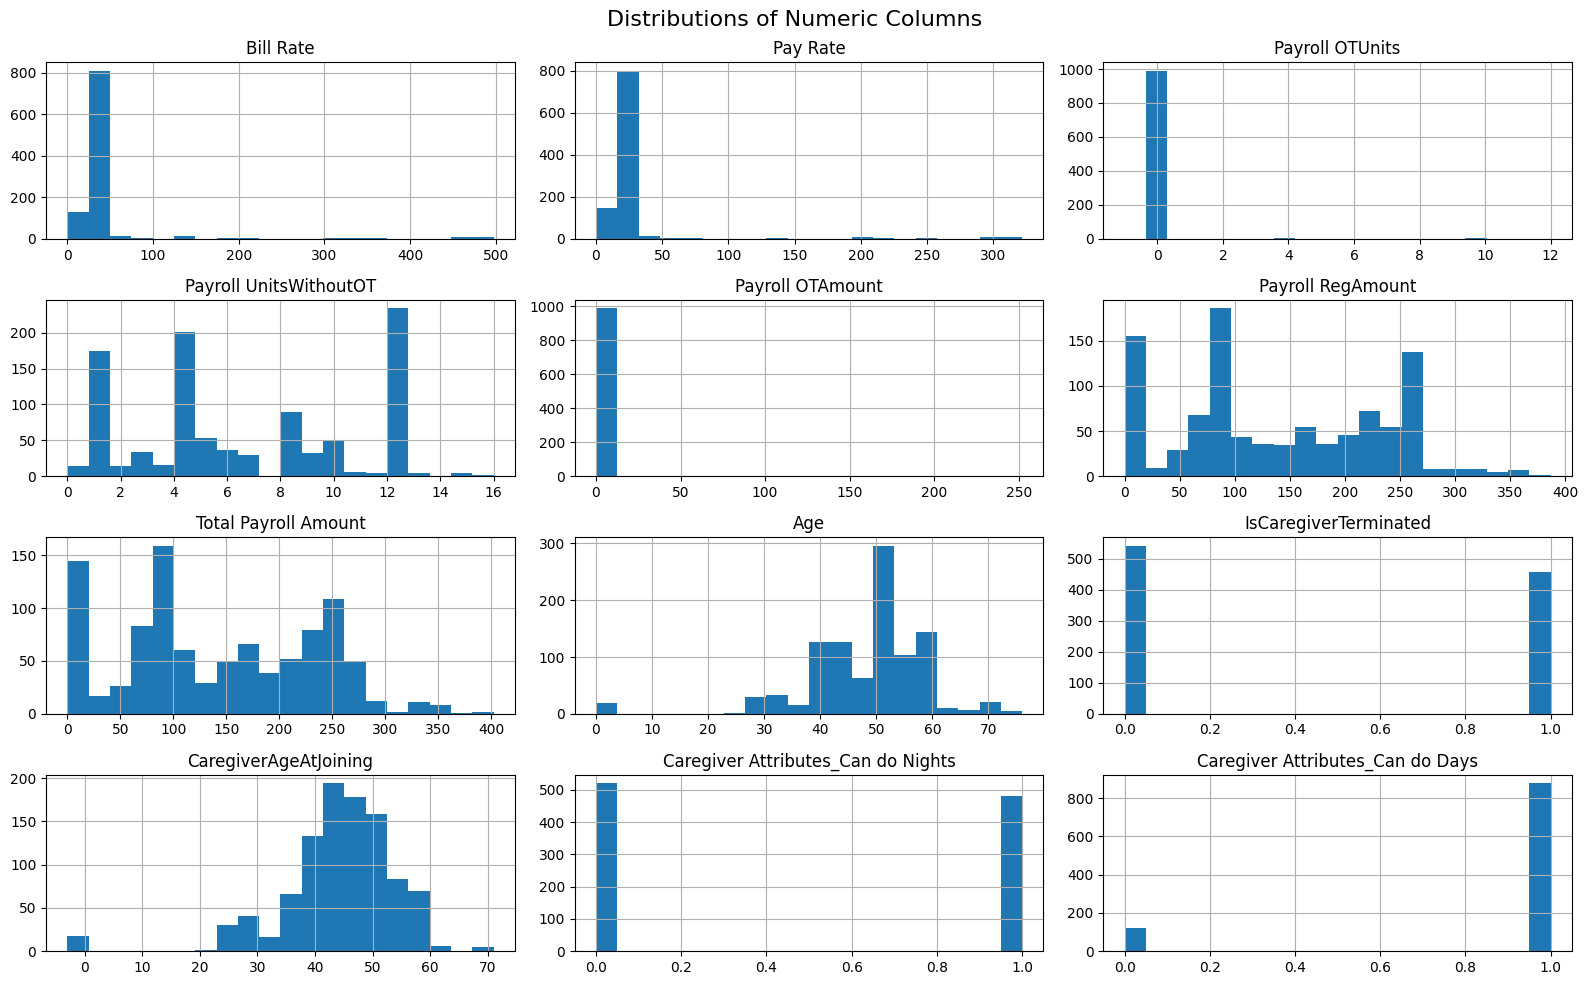

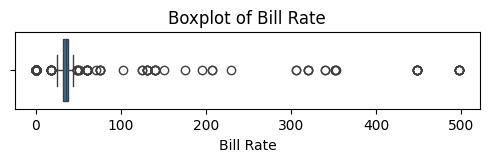

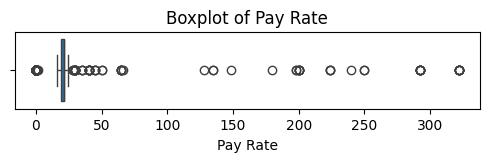

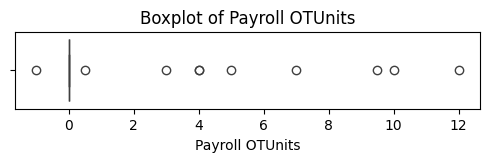

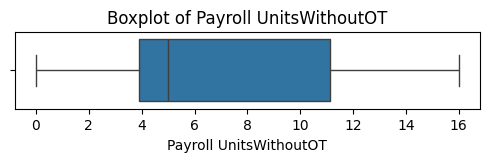

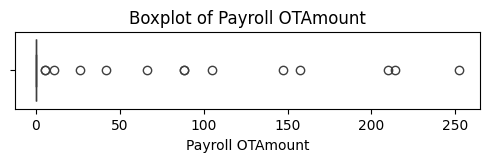

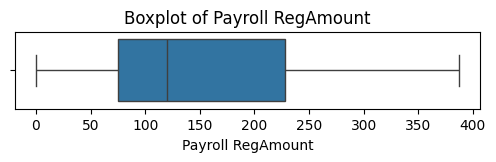

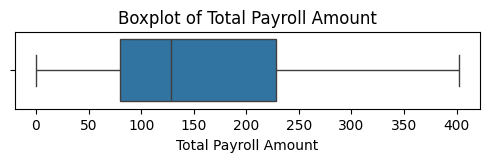

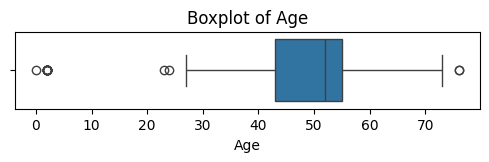

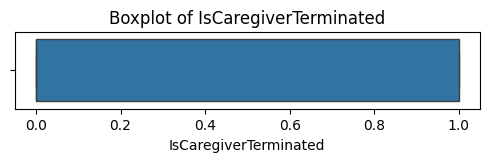

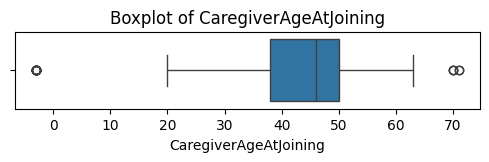

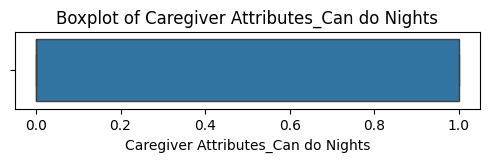

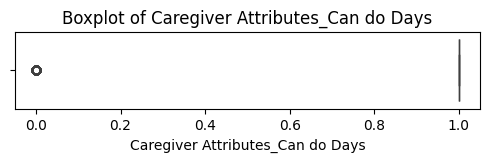

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns

# Histograms
df[numeric_cols].hist(bins=20, figsize=(16, 10))
plt.suptitle("Distributions of Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()

# Boxplots to detect outliers
for col in numeric_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


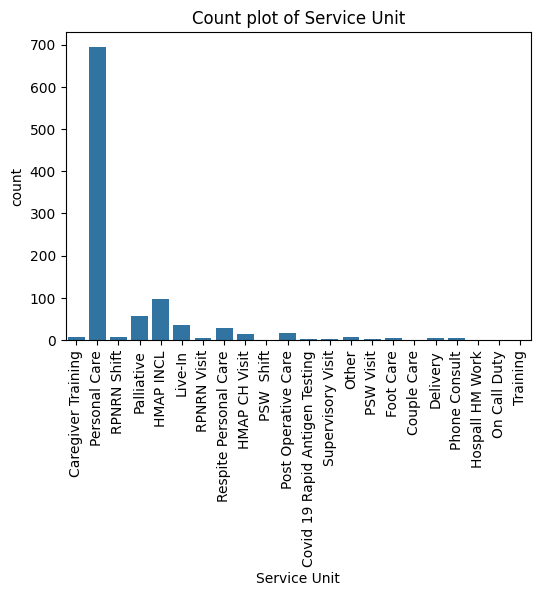

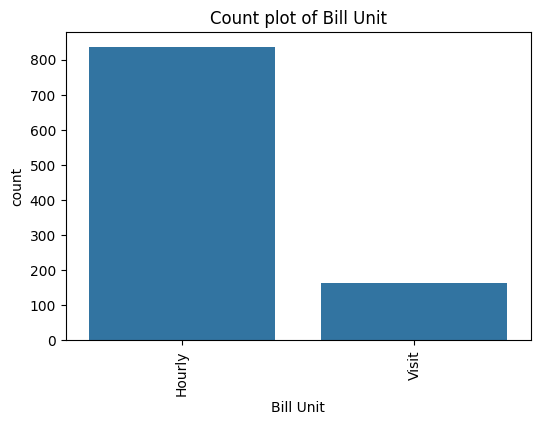

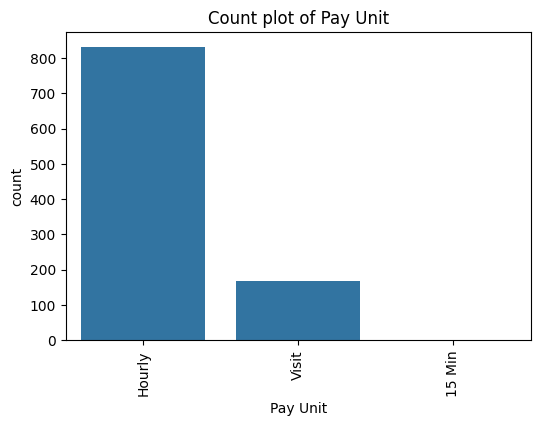

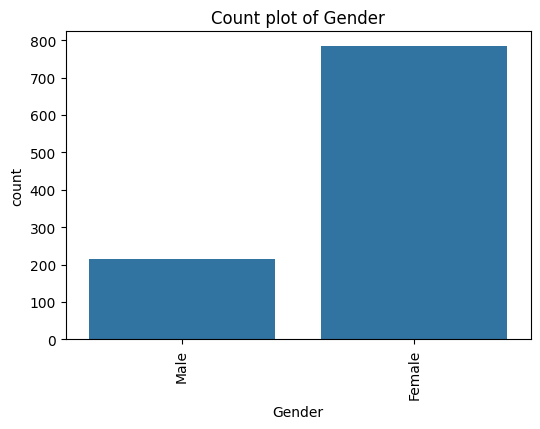

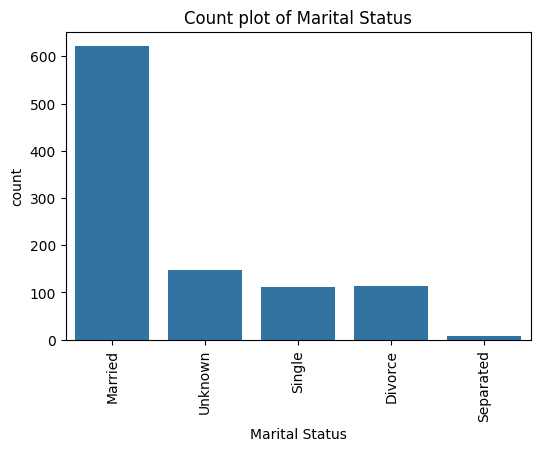

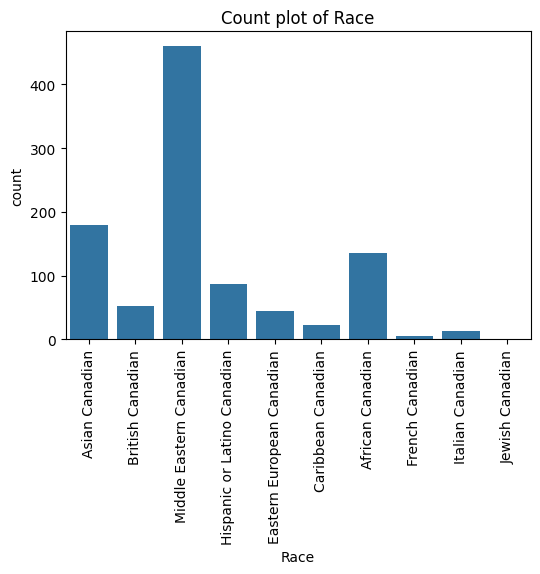

In [ ]:
categorical_cols = df.select_dtypes(exclude='number').columns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=90)
    plt.show()


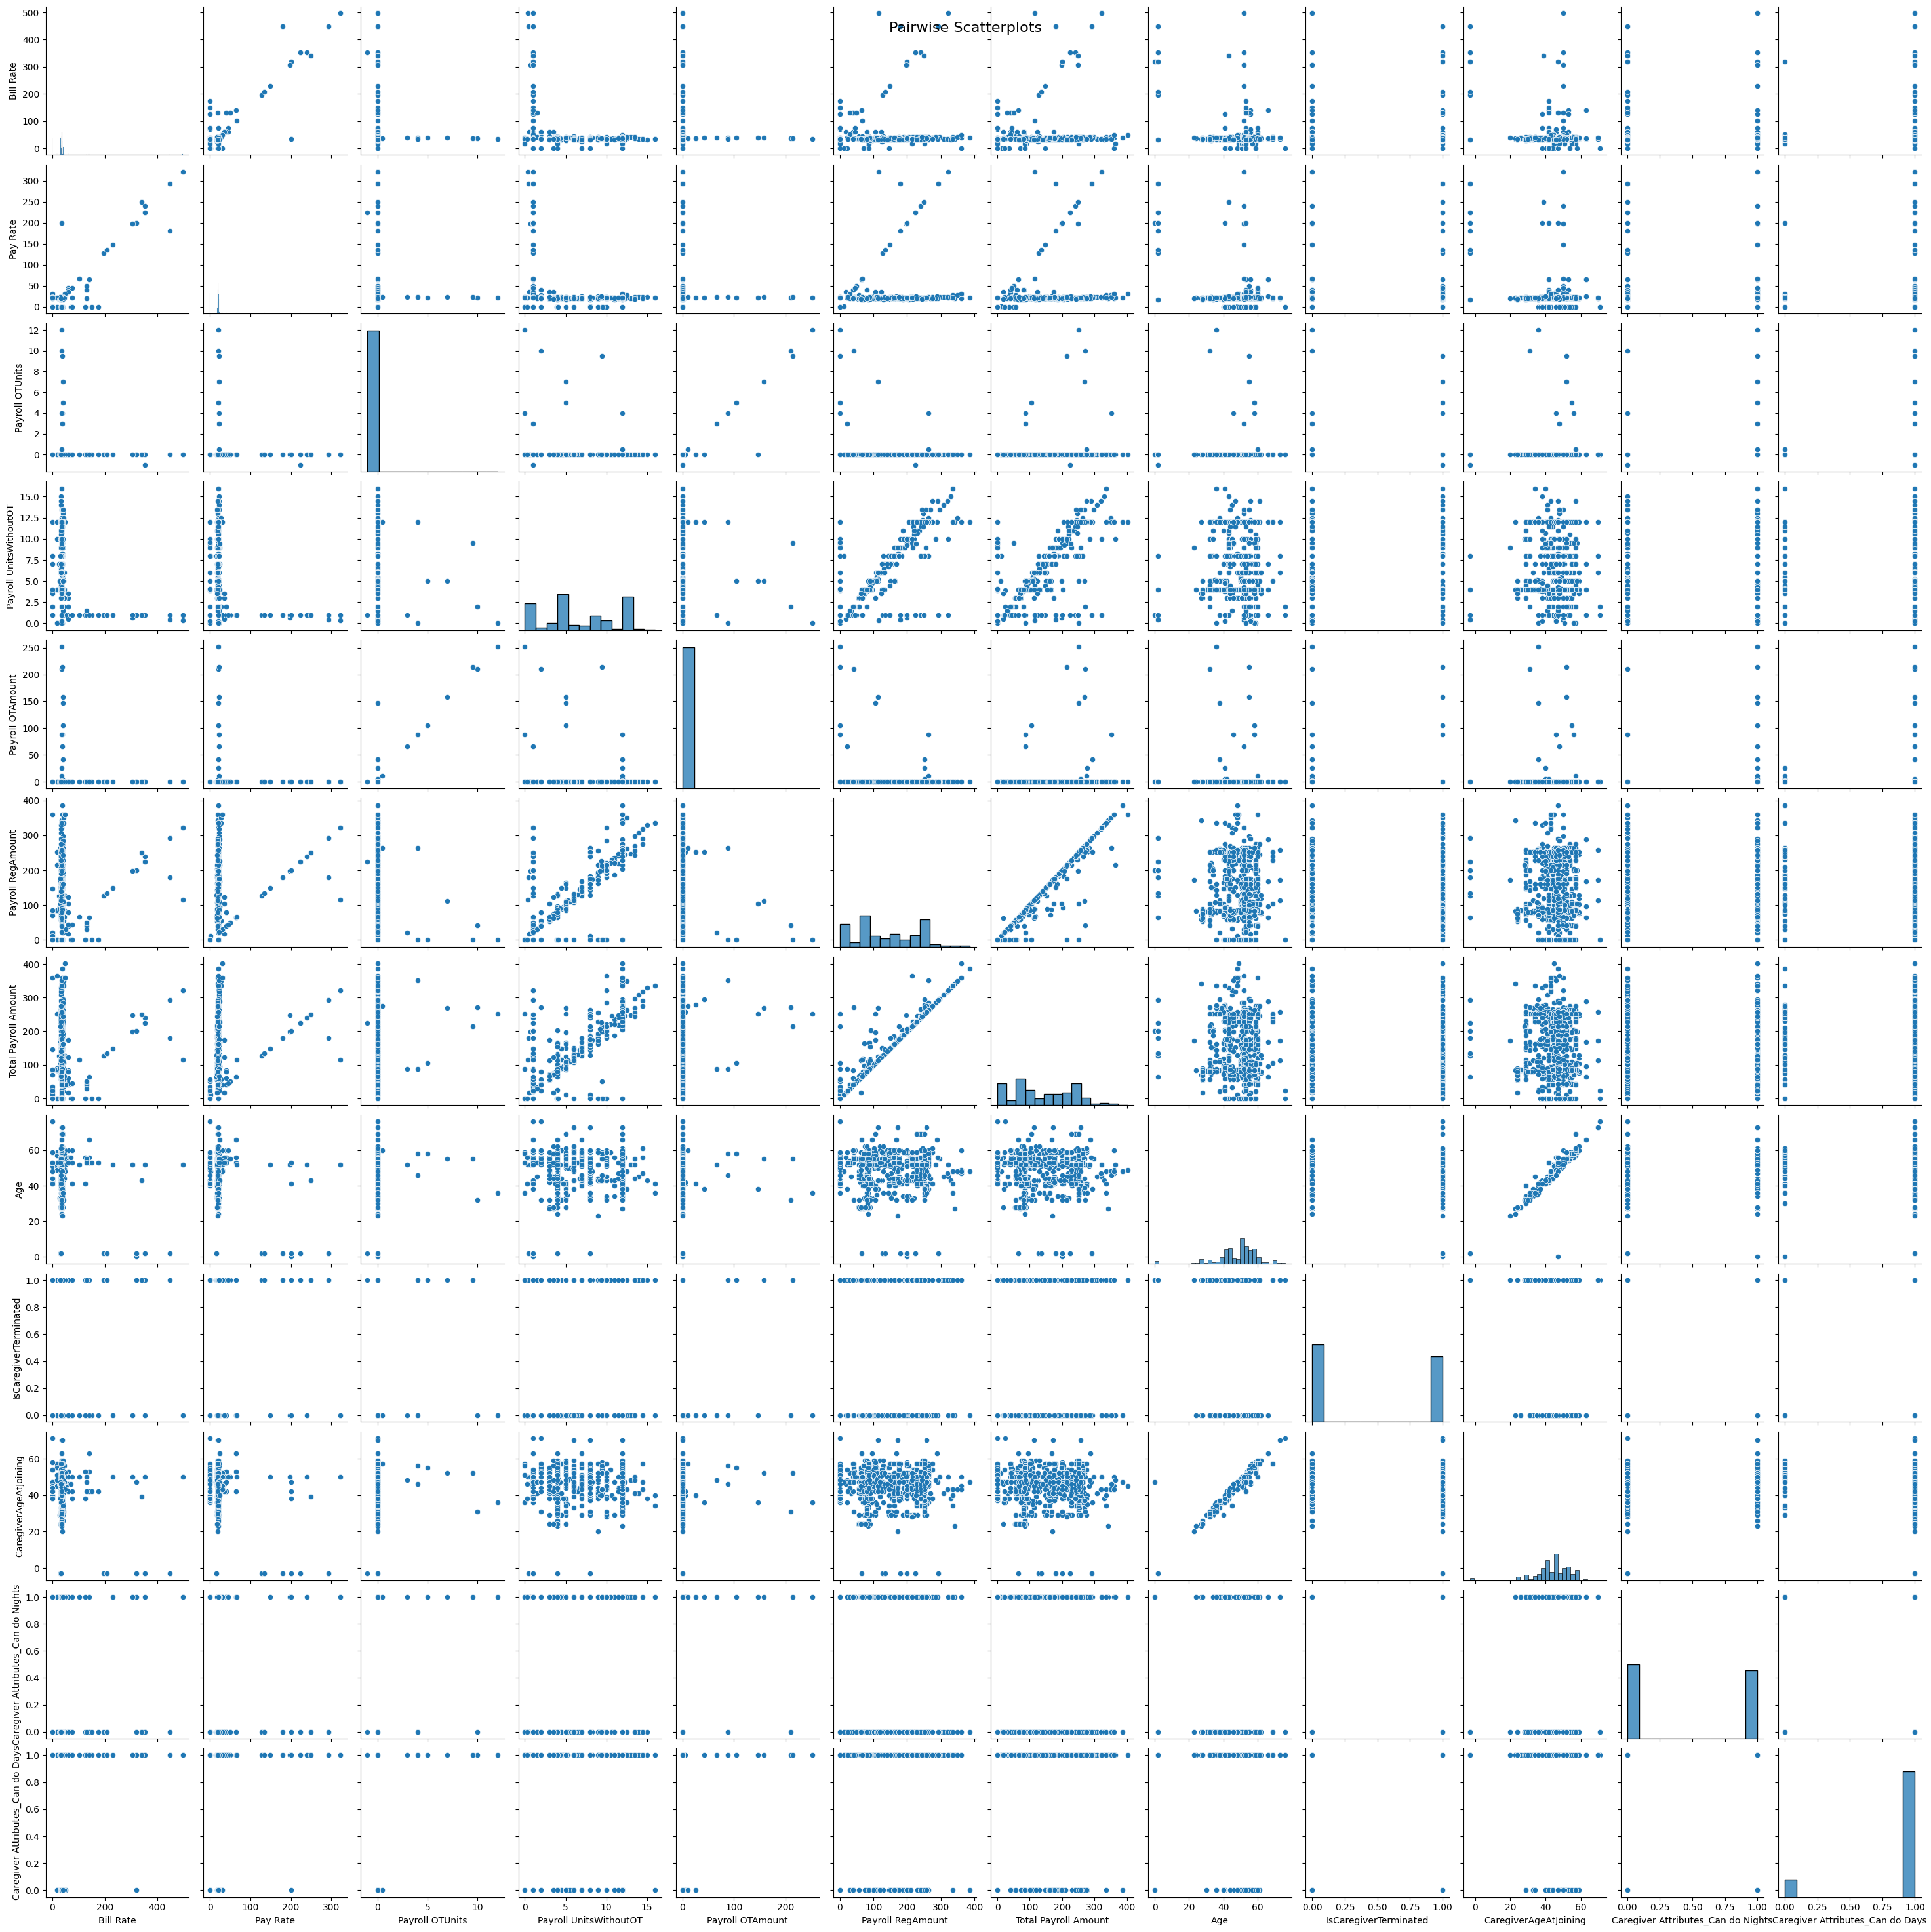

In [ ]:
# Correlation matrix will be covered later
sns.pairplot(df[numeric_cols])
plt.suptitle("Pairwise Scatterplots", fontsize=16)
plt.show()


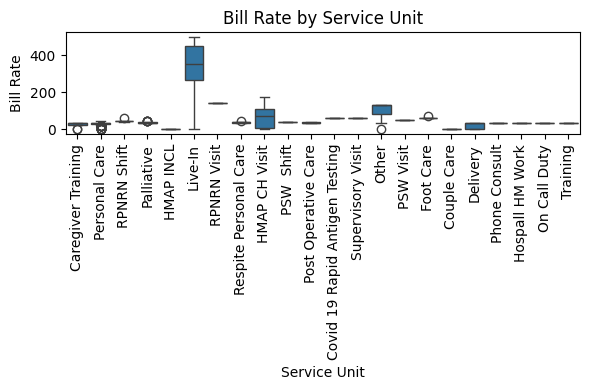

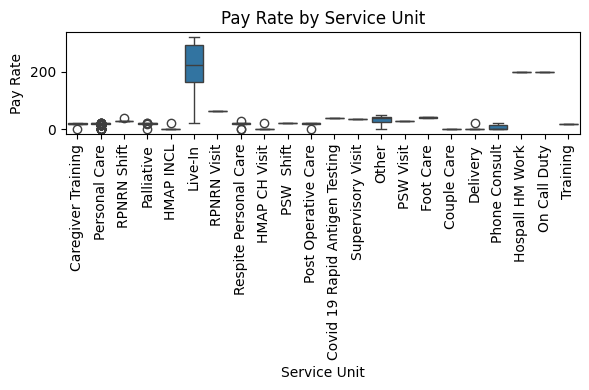

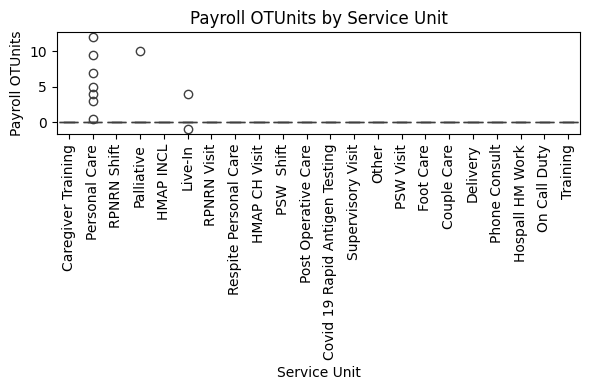

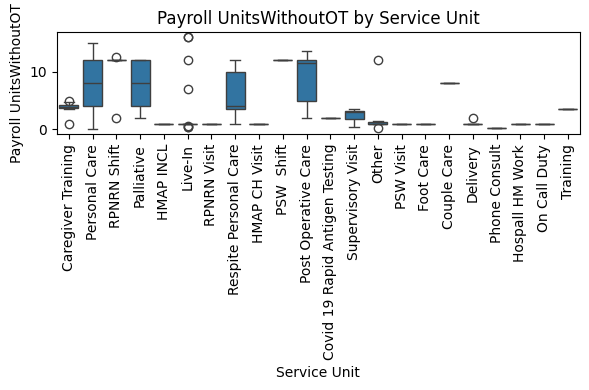

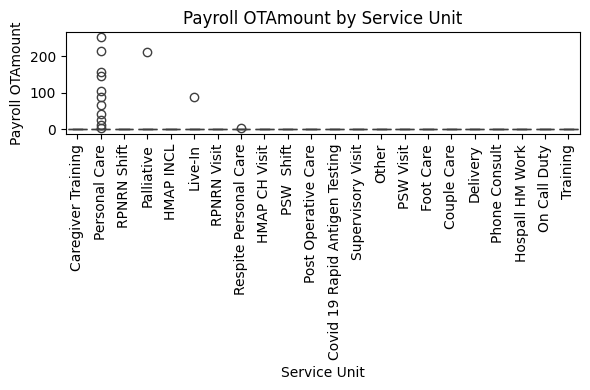

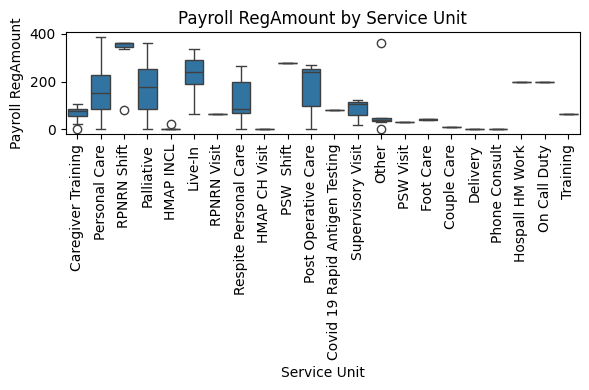

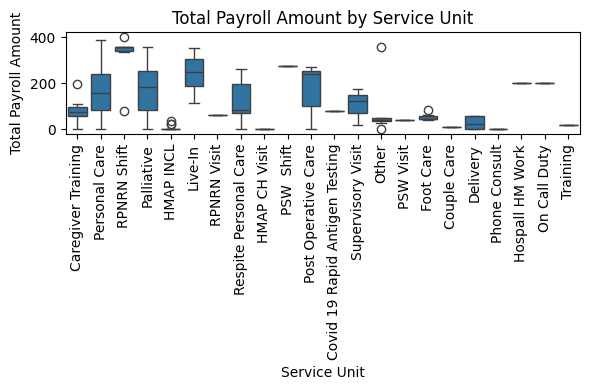

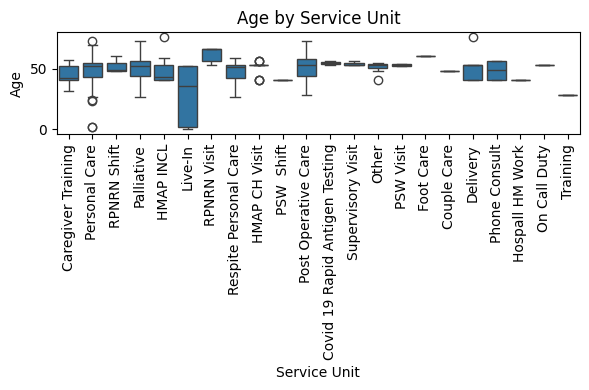

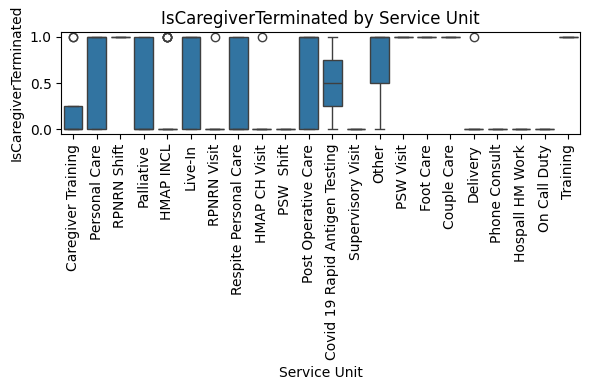

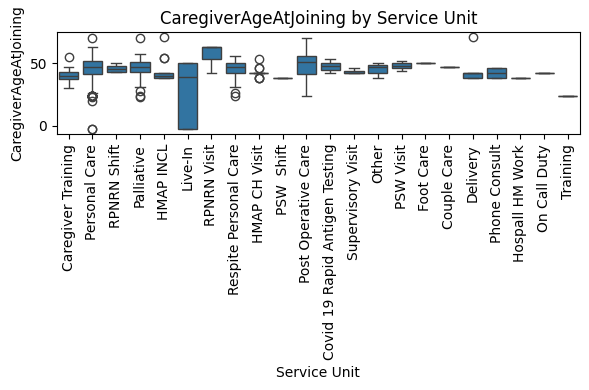

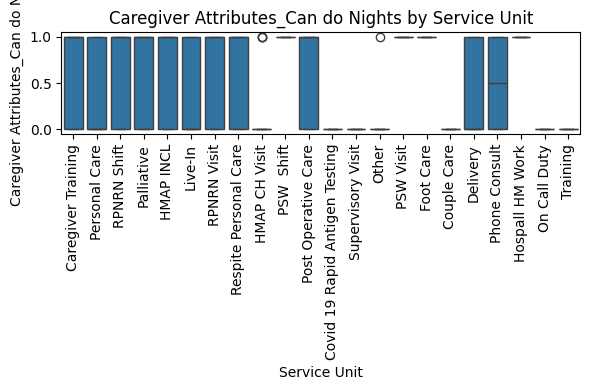

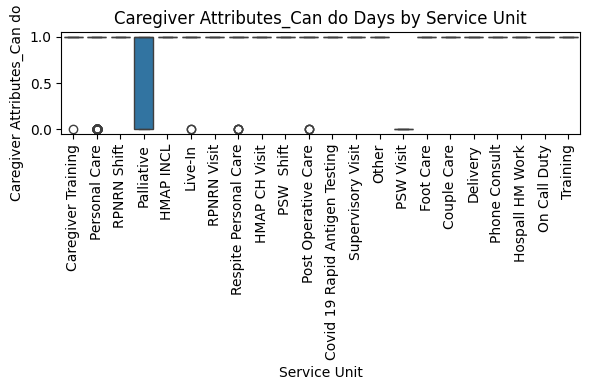

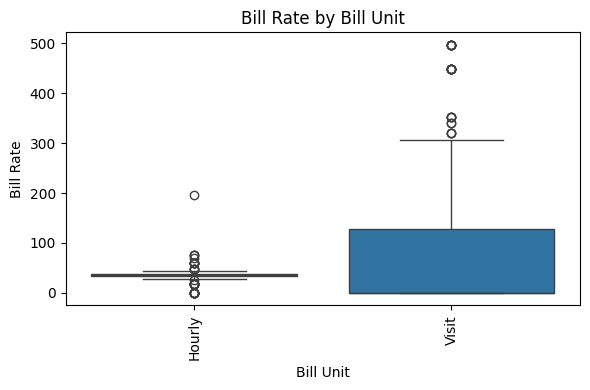

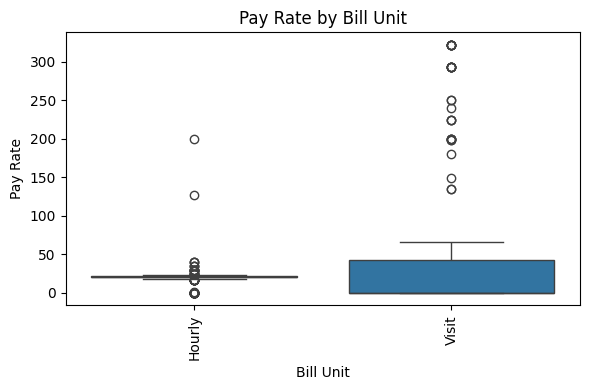

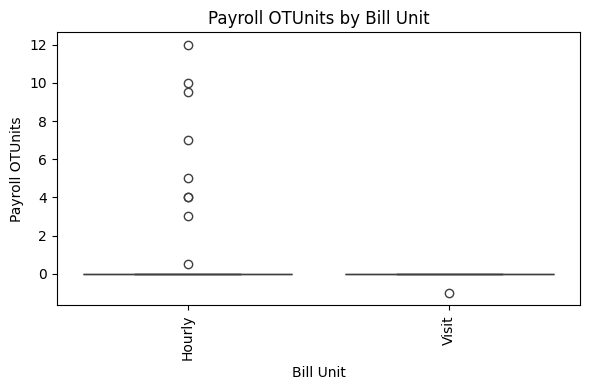

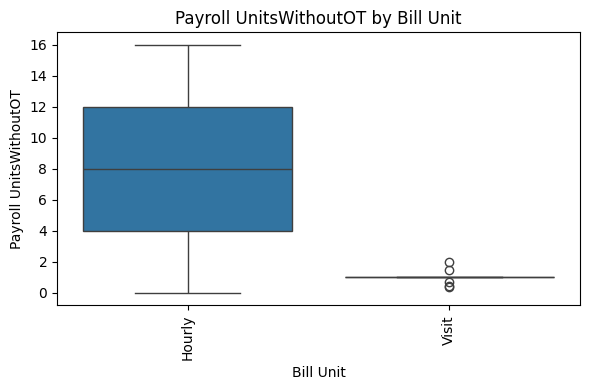

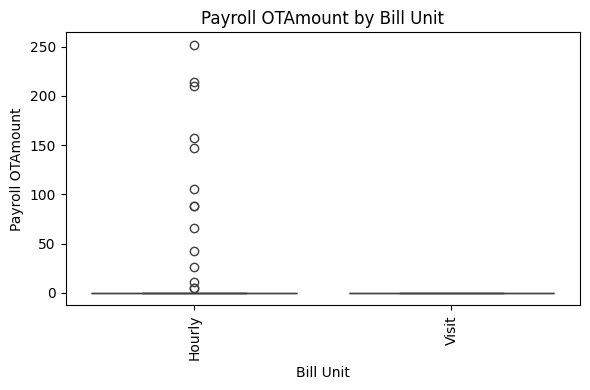

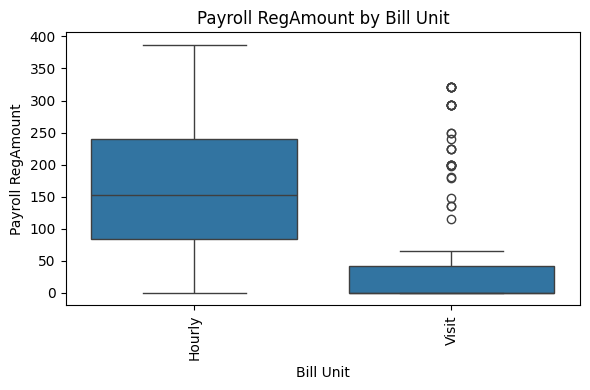

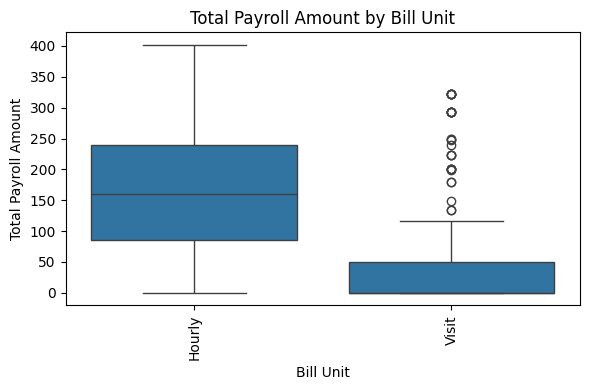

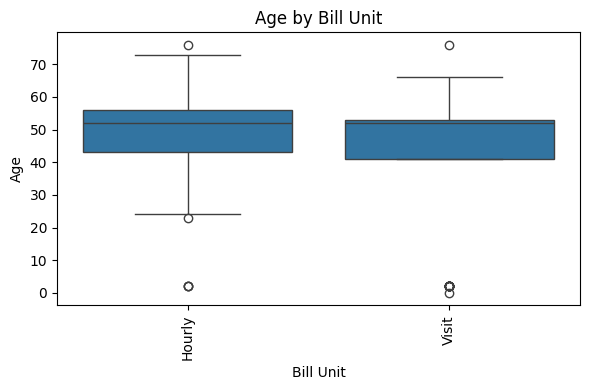

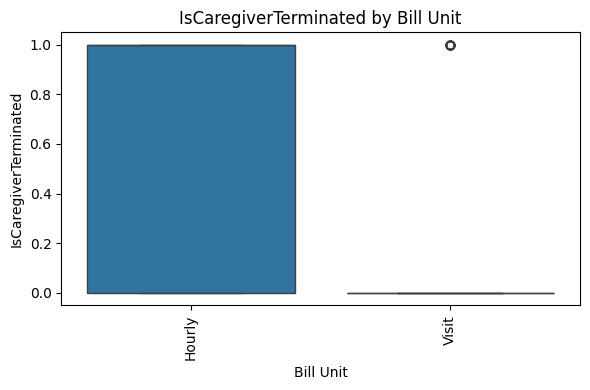

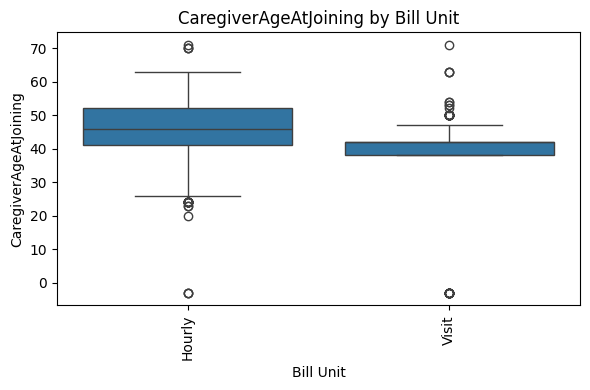

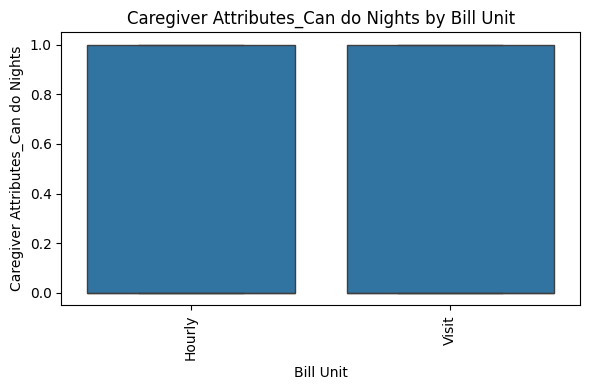

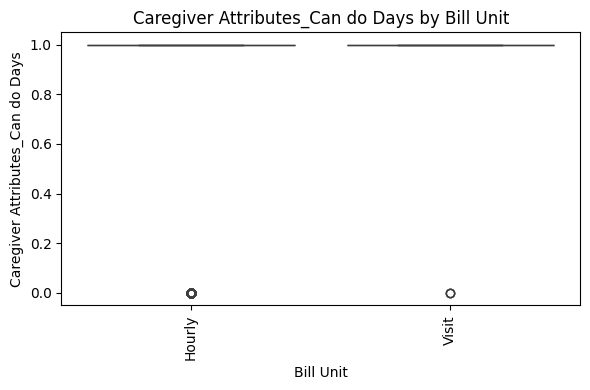

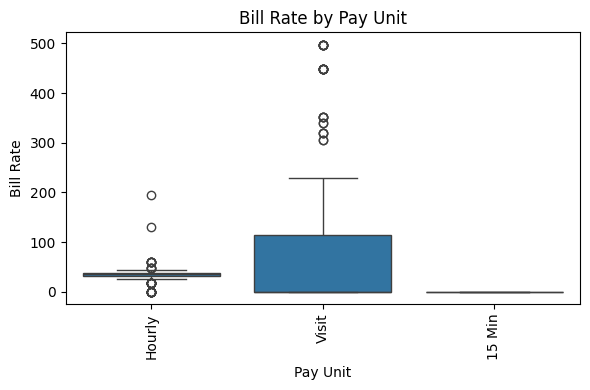

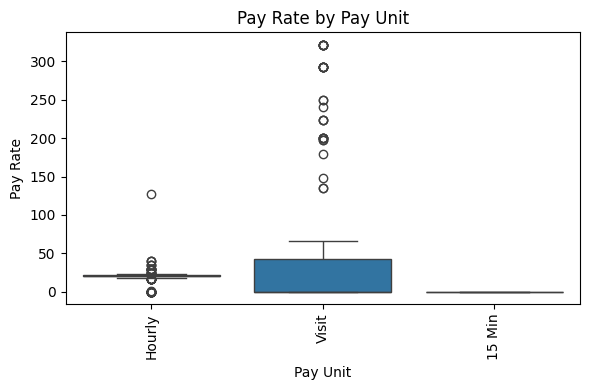

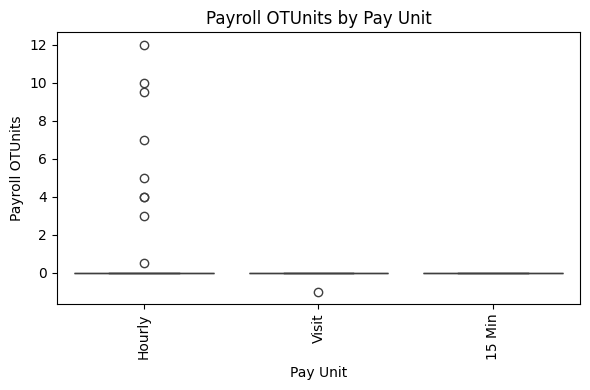

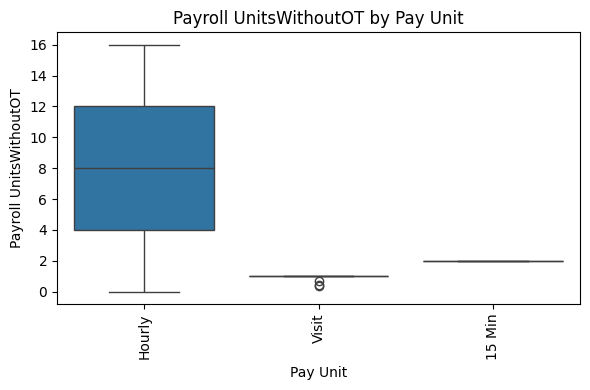

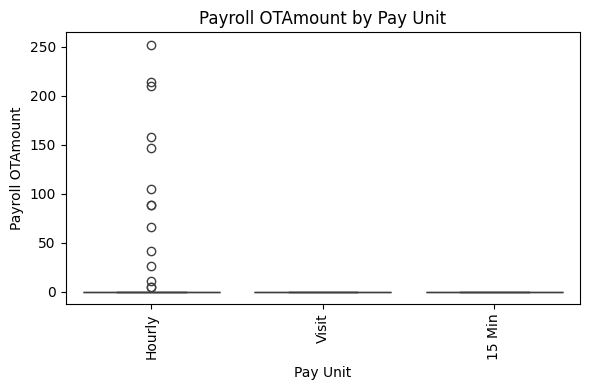

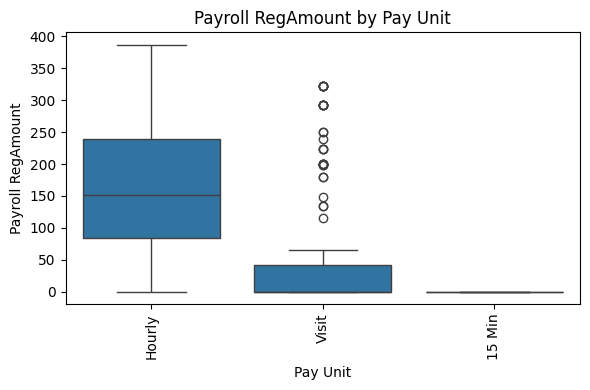

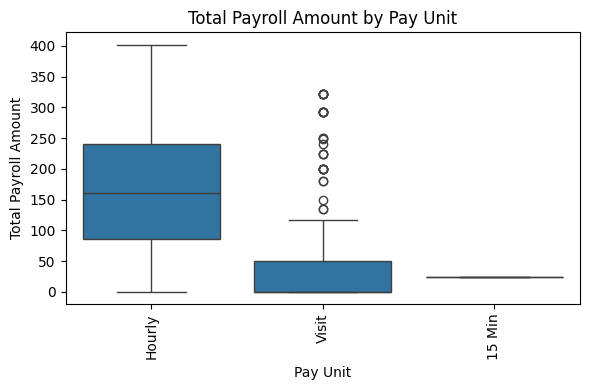

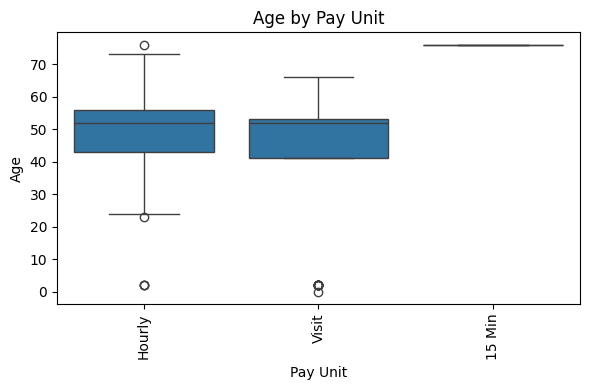

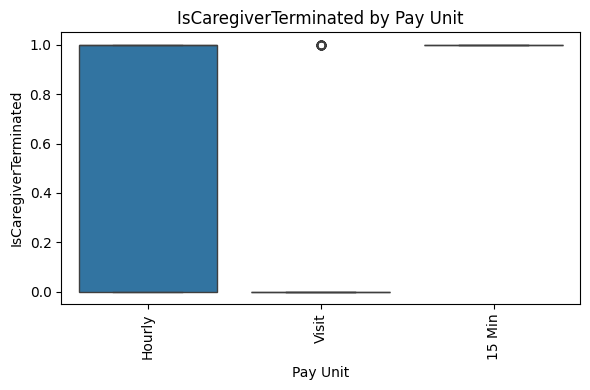

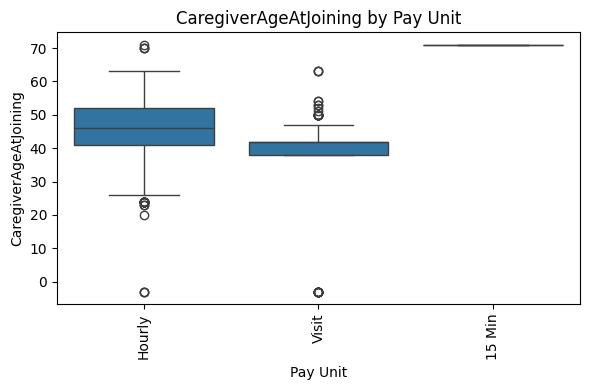

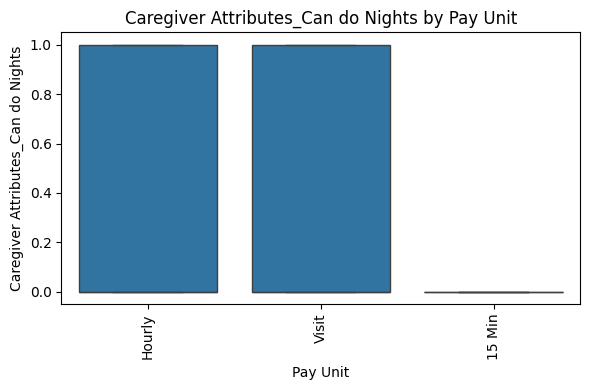

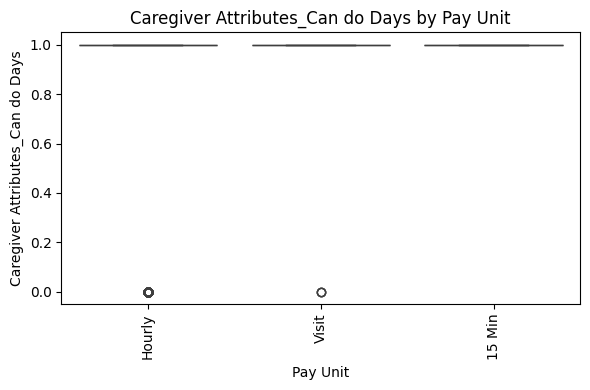

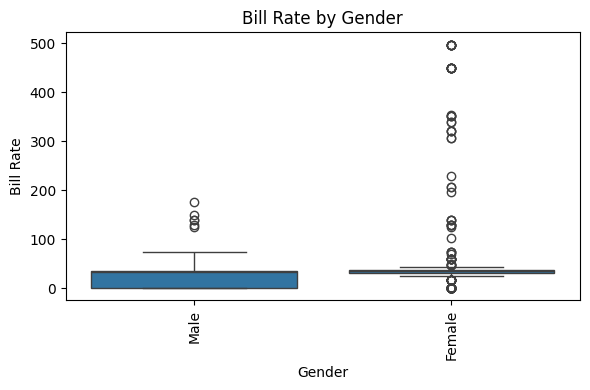

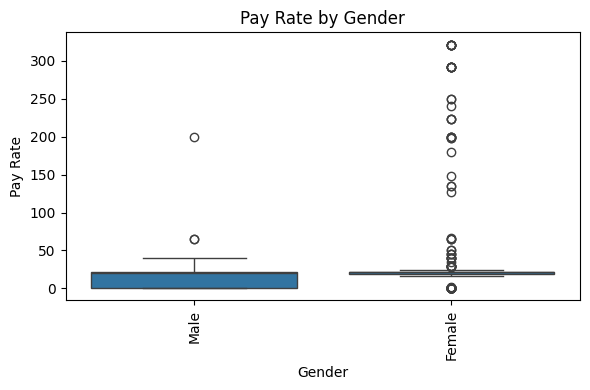

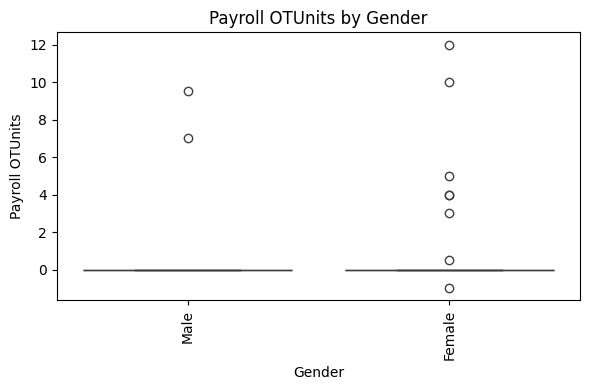

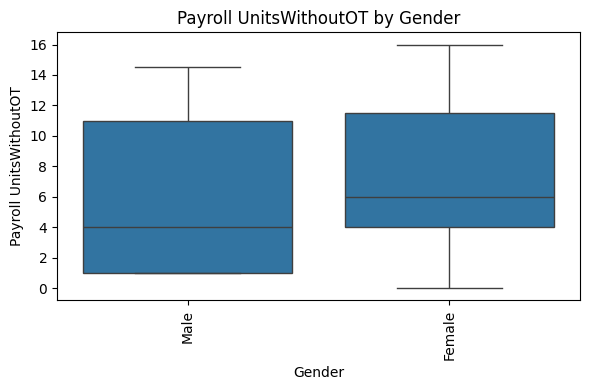

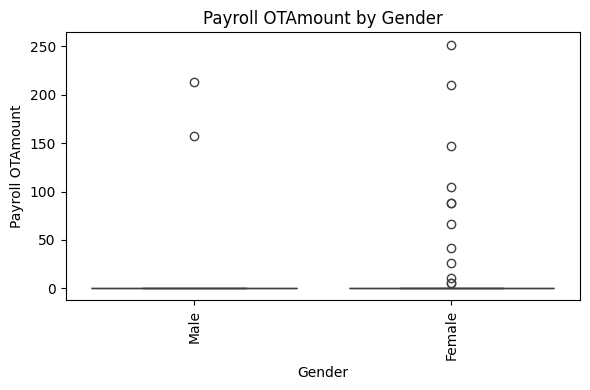

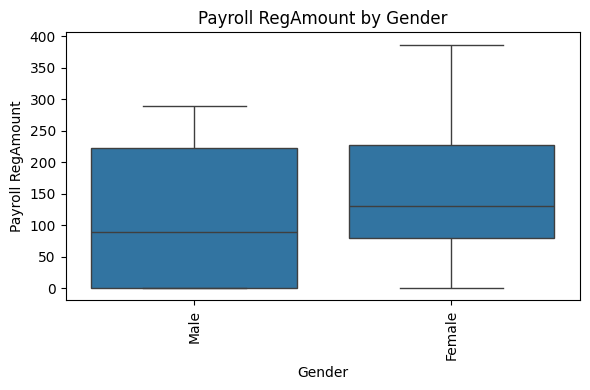

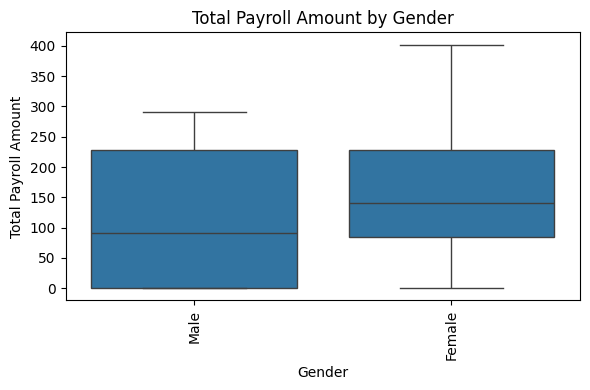

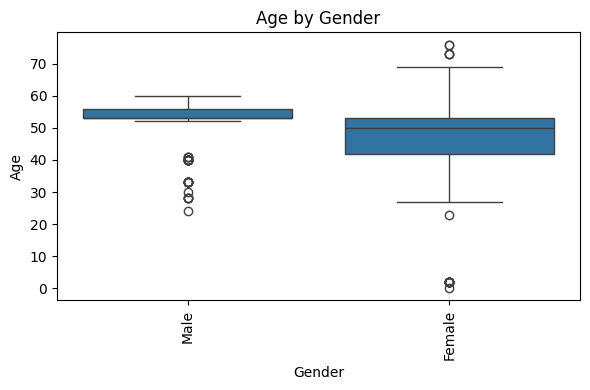

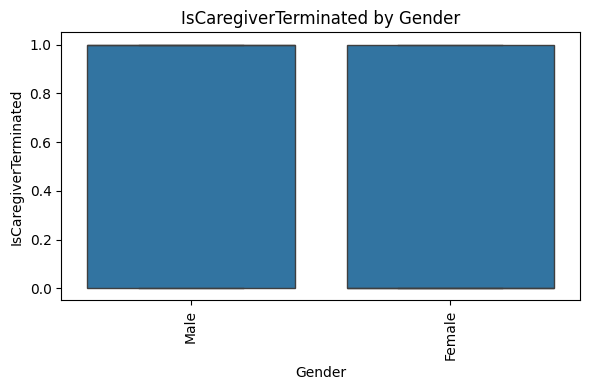

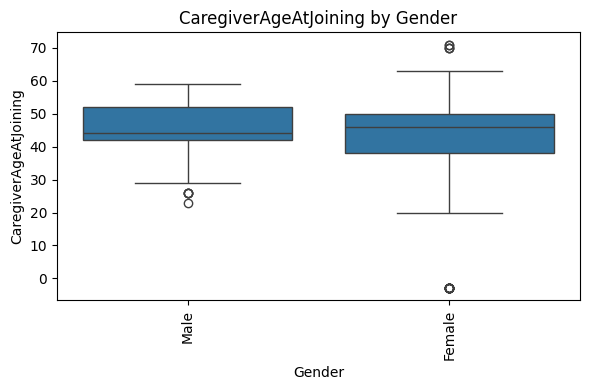

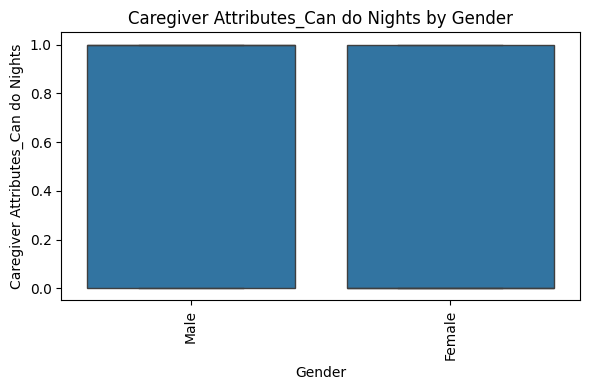

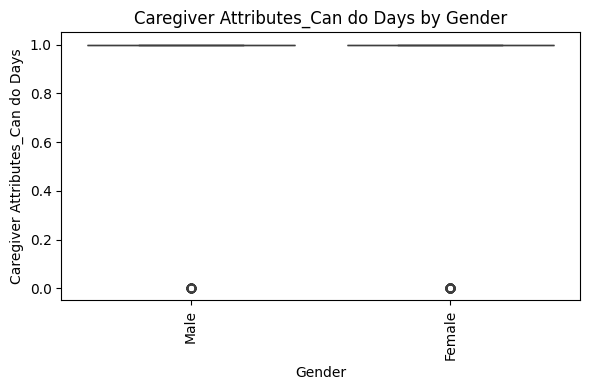

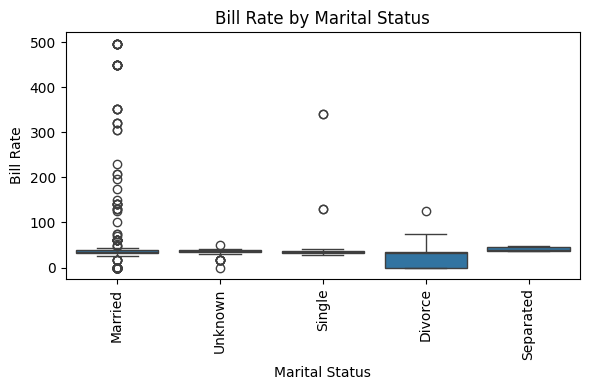

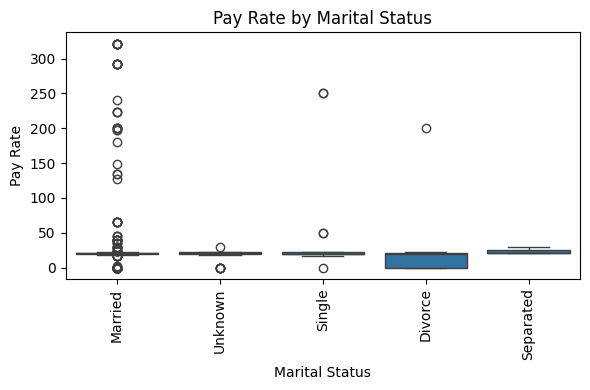

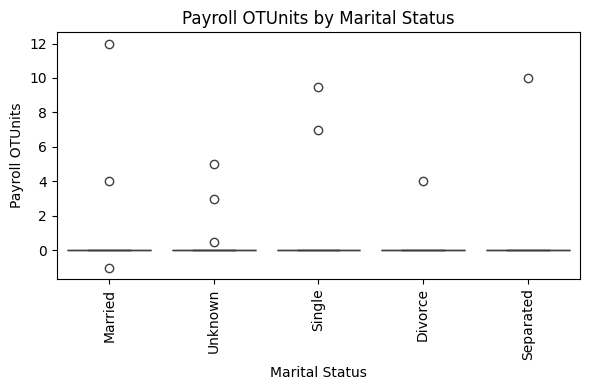

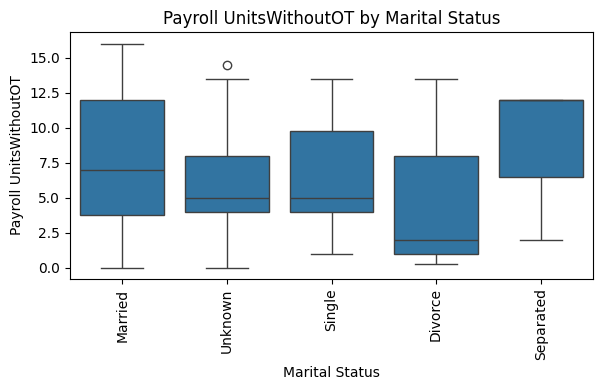

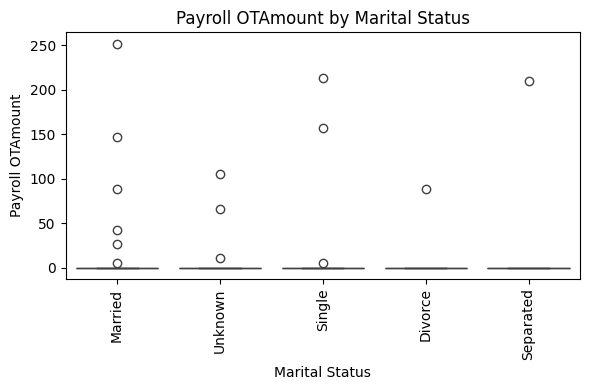

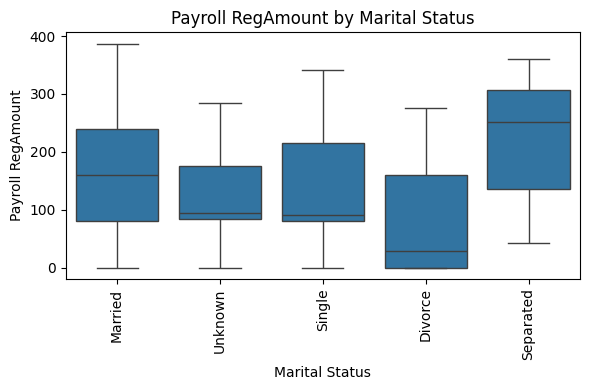

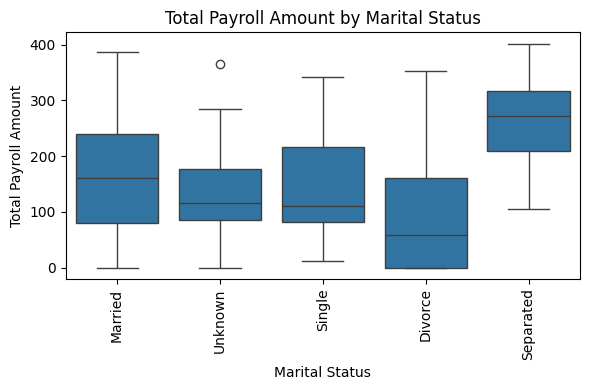

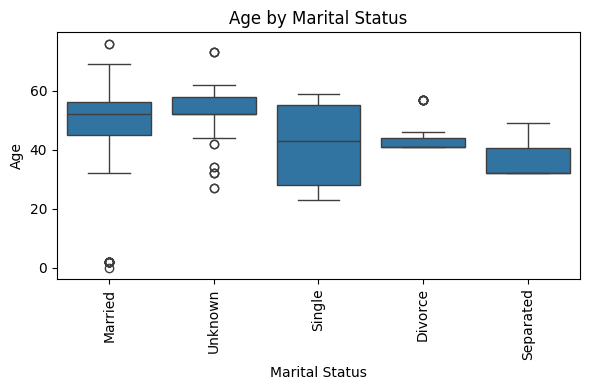

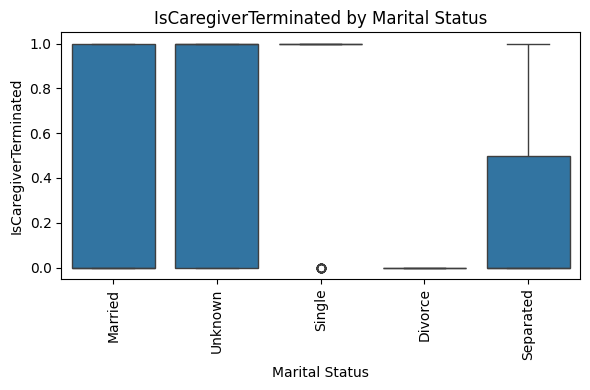

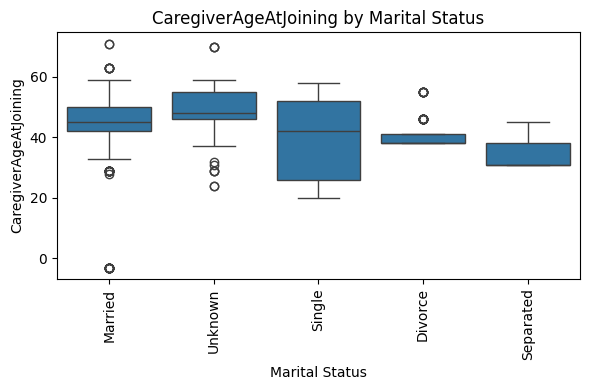

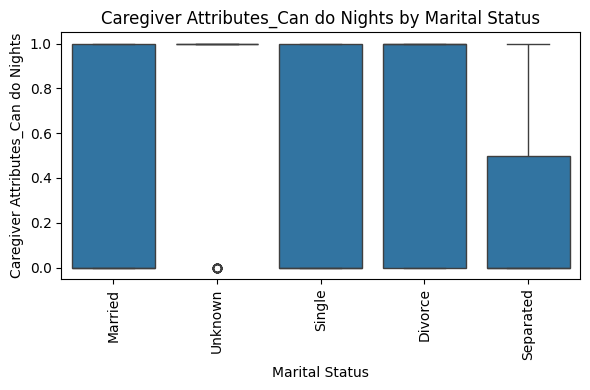

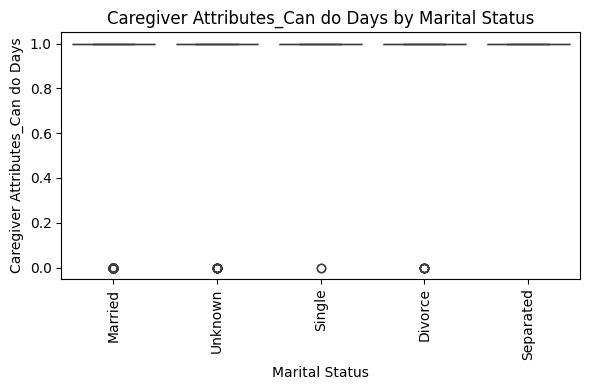

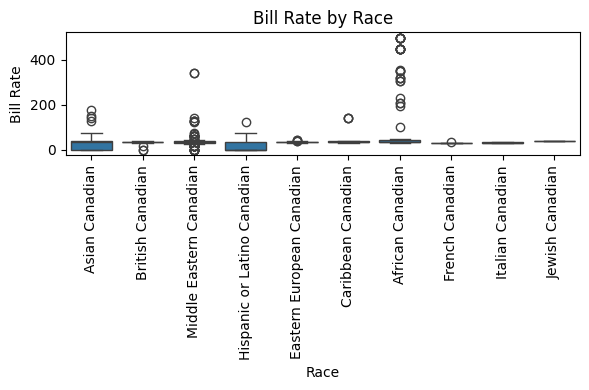

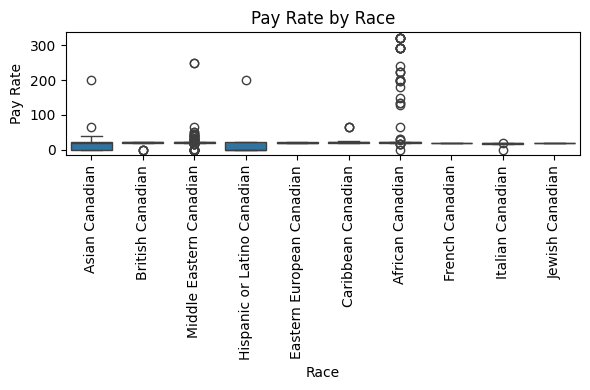

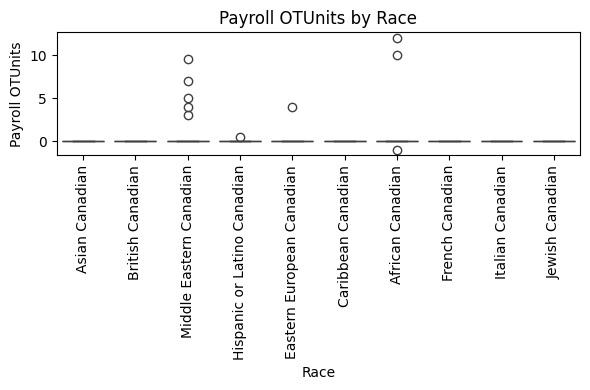

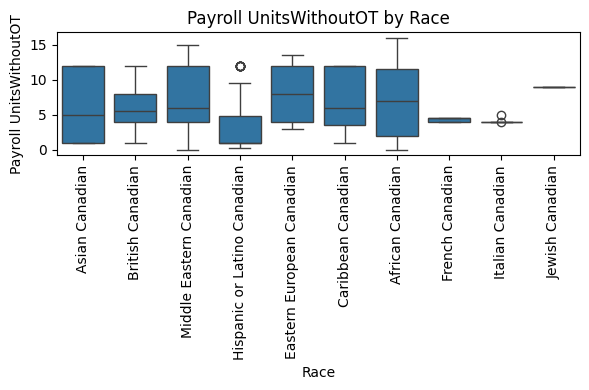

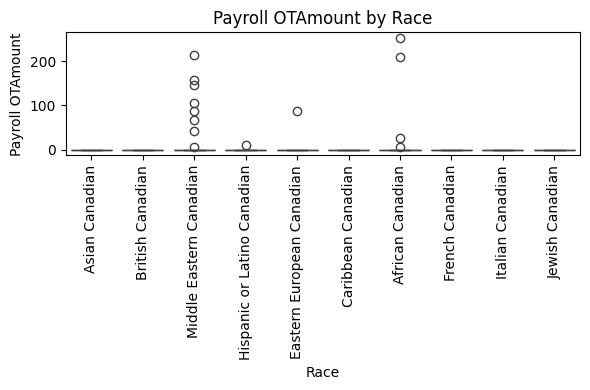

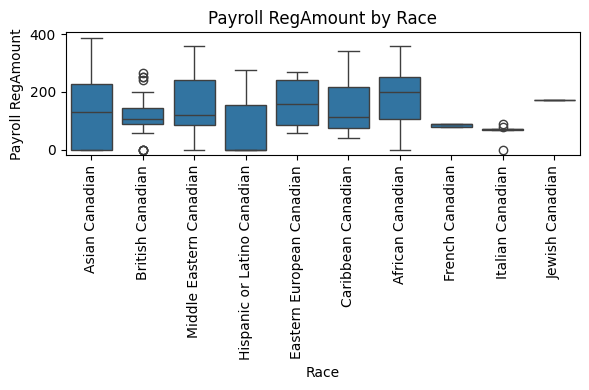

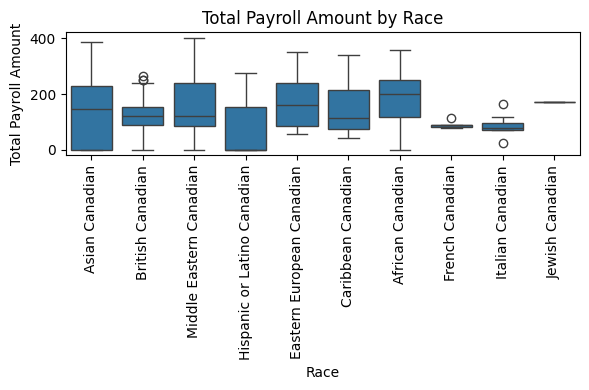

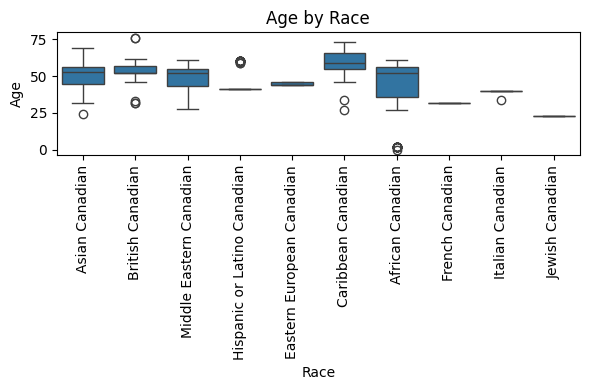

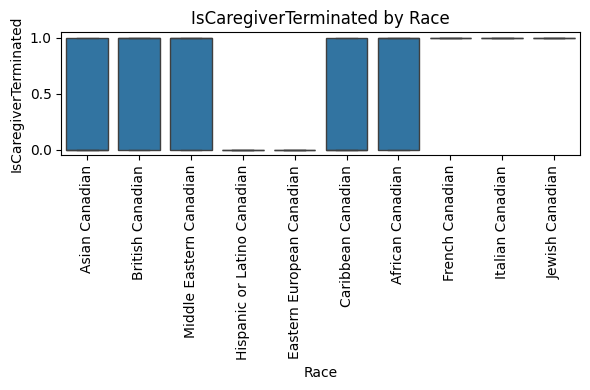

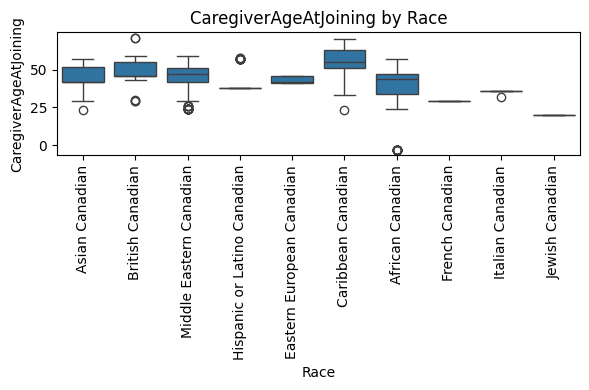

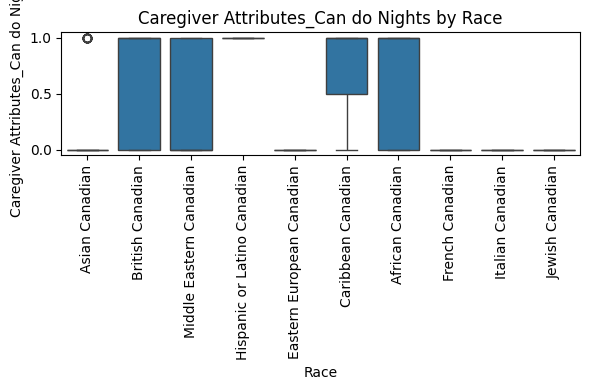

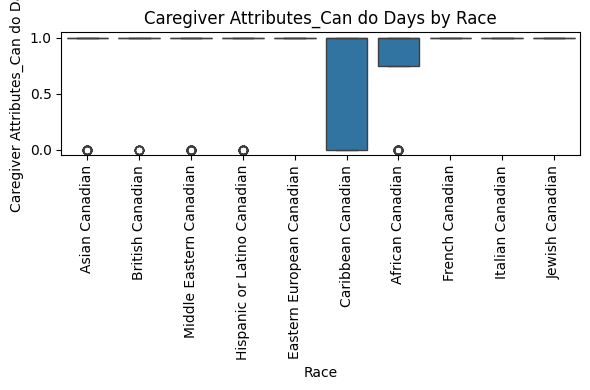

In [ ]:
for cat_col in categorical_cols:
    for num_col in numeric_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[cat_col], y=df[num_col])
        plt.title(f'{num_col} by {cat_col}')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()


In [ ]:
###Added Tenure years from age and caregiver age at joining:
df["CaregiverTenureYears"] = df["Age"] - df["CaregiverAgeAtJoining"]

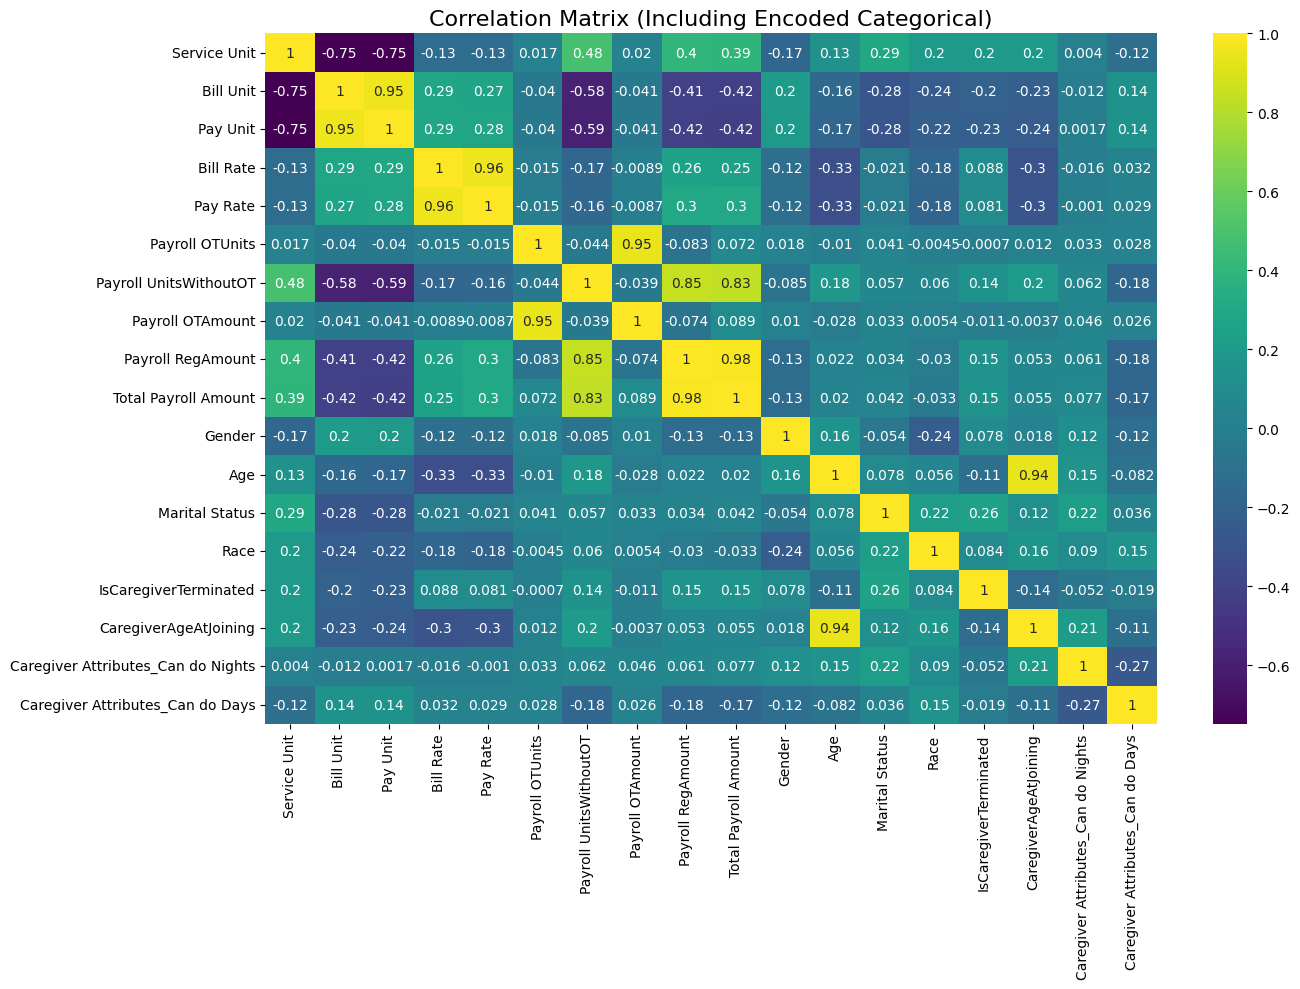

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])

# New correlation heatmap including categorical
plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='viridis')
plt.title("Correlation Matrix (Including Encoded Categorical)", fontsize=16)
plt.tight_layout()
plt.show()


Bill Unit <-> Pay Unit\
Bill Rate <-> Pay Rate\
Payroll OTUnits <-> Payroll OTAmount\
PayrollRegAmount <-> TotalPayrollAmount\
Age <-> CaregiverAgeAtJoining

In [ ]:
target = 'IsCaregiverTerminated'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
features = X.columns

# Create DataFrame of feature importances
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importances_df)


                               Feature  Importance
14               CaregiverAgeAtJoining    0.203242
11                                 Age    0.164829
12                      Marital Status    0.088840
9                 Total Payroll Amount    0.087143
8                    Payroll RegAmount    0.076087
3                            Bill Rate    0.072401
13                                Race    0.072252
4                             Pay Rate    0.068781
6               Payroll UnitsWithoutOT    0.045852
15  Caregiver Attributes_Can do Nights    0.029421
10                              Gender    0.027400
0                         Service Unit    0.026905
16    Caregiver Attributes_Can do Days    0.024921
7                     Payroll OTAmount    0.004025
1                            Bill Unit    0.003607
2                             Pay Unit    0.003485
5                      Payroll OTUnits    0.000809


<ipython-input-57-1666272495>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances_df.head(15), x='Importance', y='Feature', palette='viridis')


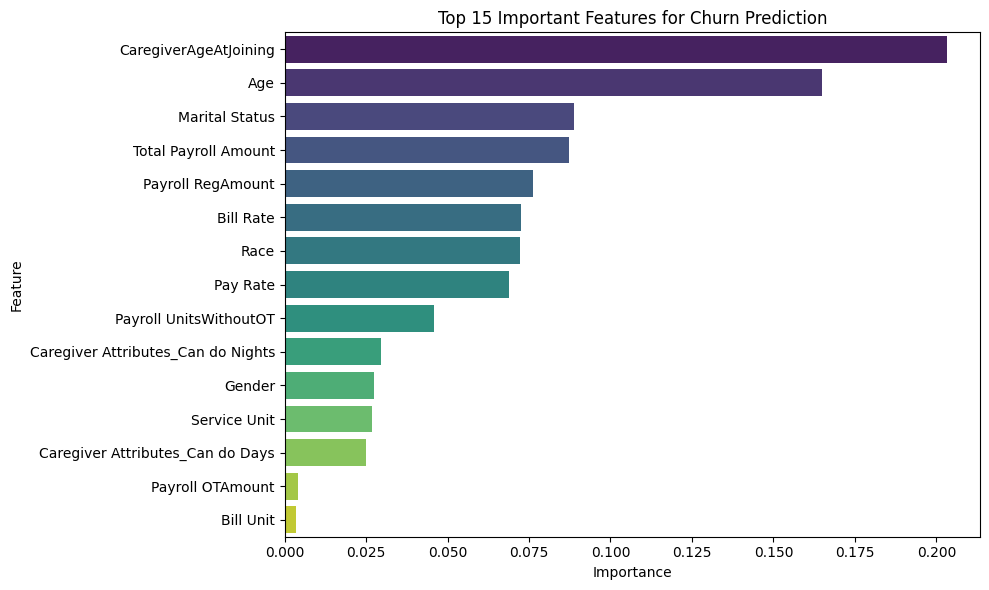

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title("Top 15 Important Features for Churn Prediction")
plt.tight_layout()
plt.show()


In [ ]:
# df.drop(columns=['Bill Unit','Bill Rate','Payroll OTUnits', 'Payroll RegAmount'],inplace= True)
df.drop(columns=['TerminatedMonth','TerminatedYear','CaregiverTenureYears'],inplace=True)


In [ ]:
###Added Tenure years from age and caregiver age at joining:
df["CaregiverTenureYears"] = df["Age"] - df["CaregiverAgeAtJoining"]
df.drop(columns=["CaregiverAgeAtJoining"], inplace=True)


### XG model

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Service Unit                        1000 non-null   object 
 1   Pay Unit                            1000 non-null   object 
 2   Pay Rate                            1000 non-null   float64
 3   Payroll UnitsWithoutOT              1000 non-null   float64
 4   Payroll OTAmount                    1000 non-null   float64
 5   Total Payroll Amount                1000 non-null   float64
 6   Gender                              1000 non-null   object 
 7   Age                                 1000 non-null   int64  
 8   Marital Status                      1000 non-null   object 
 9   Race                                1000 non-null   object 
 10  IsCaregiverTerminated               1000 non-null   int64  
 11  Caregiver Attributes_Can do Nights  1000 non

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier


In [ ]:
# Assuming your DataFrame is named `df`
X = df.drop(columns=["IsCaregiverTerminated"])
y = df["IsCaregiverTerminated"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:49:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.97
Confusion Matrix:
 [[107   1]
 [  5  87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.99      0.95      0.97        92

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



<Figure size 1500x600 with 0 Axes>

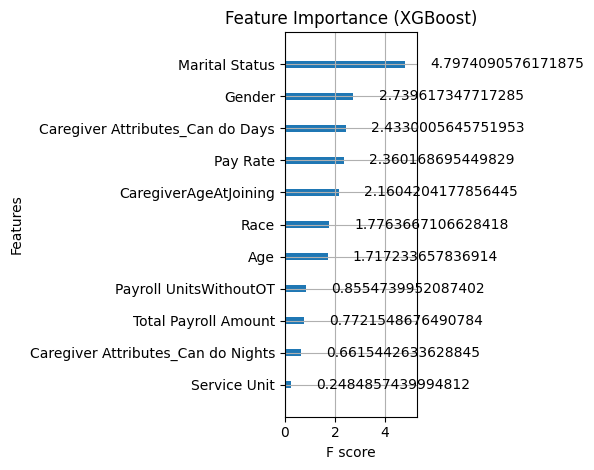

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(15, 6))
plot_importance(model, importance_type="gain")
plt.title("Feature Importance (XGBoost)")
plt.tight_layout()
plt.show()


In [ ]:
# # sample_dict = {
# #     'Pay Unit': 36,
# #     'Pay Rate': 22.0,
# #     'Payroll UnitsWithoutOT': 88,
# #     'Payroll OTAmount': 4,
# #     'Total Payroll Amount': 0,
# #     'Gender': 0,  # Female
# #     'Age': 60,
# #     'CaregiverAgeAtJoining': 57,
# #     'Caregiver Attributes_Can do Nights': 1,
# #     'Caregiver Attributes_Can do Days': 0
# # }

# sample_dicts = [
#     {
#         'Pay Unit': 34,
#         'Pay Rate': 21.5,
#         'Payroll UnitsWithoutOT': 215,
#         'Payroll OTAmount': 10,
#         'Total Payroll Amount': 0,
#         'Gender': 0,  # Female
#         'Age': 45,
#         'CaregiverAgeAtJoining': 43,
#         'Caregiver Attributes_Can do Nights': 0,
#         'Caregiver Attributes_Can do Days': 1
#     },
#     {
#         'Pay Unit': 32,
#         'Pay Rate': 20.0,
#         'Payroll UnitsWithoutOT': 120,
#         'Payroll OTAmount': 6,
#         'Total Payroll Amount': 0,
#         'Gender': 0,  # Female
#         'Age': 60,
#         'CaregiverAgeAtJoining': 50,
#         'Caregiver Attributes_Can do Nights': 1,
#         'Caregiver Attributes_Can do Days': 1
#     }
# ]




# sample_df = pd.DataFrame(sample_dicts)

# predictions = model.predict(sample_df)
# probas = model.predict_proba(sample_df)[:, 1]

# for i, (pred, proba) in enumerate(zip(predictions, probas)):
#     print(f"Sample {i+1} - Predicted Termination: {pred}, Probability: {round(proba, 4)}")



ValueError: feature_names mismatch: ['Service Unit', 'Pay Unit', 'Pay Rate', 'Payroll UnitsWithoutOT', 'Payroll OTAmount', 'Total Payroll Amount', 'Gender', 'Age', 'Marital Status', 'Race', 'CaregiverAgeAtJoining', 'Caregiver Attributes_Can do Nights', 'Caregiver Attributes_Can do Days'] ['Pay Unit', 'Pay Rate', 'Payroll UnitsWithoutOT', 'Payroll OTAmount', 'Total Payroll Amount', 'Gender', 'Age', 'CaregiverAgeAtJoining', 'Caregiver Attributes_Can do Nights', 'Caregiver Attributes_Can do Days']
expected Race, Marital Status, Service Unit in input data

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Prepare model and data
X = df_encoded.drop("IsCaregiverTerminated", axis=1)
y = df_encoded["IsCaregiverTerminated"]


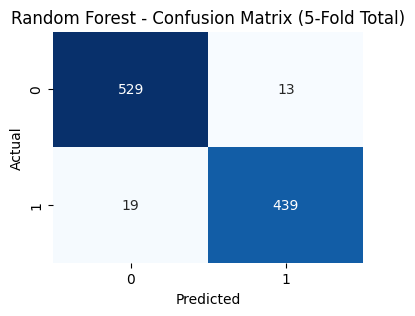


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       542
           1       0.97      0.96      0.96       458

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



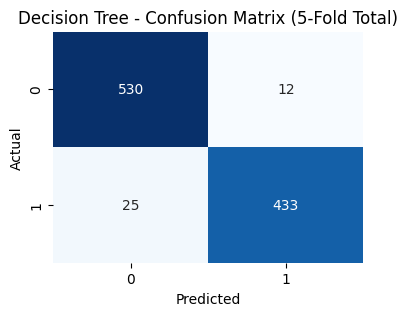


Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       542
           1       0.97      0.95      0.96       458

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



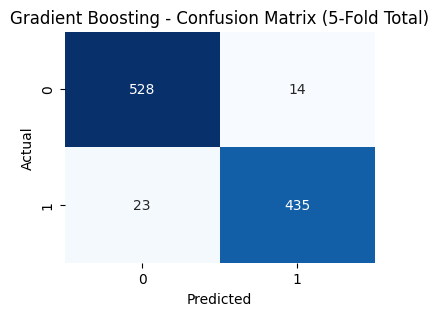


Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       542
           1       0.97      0.95      0.96       458

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:49:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:49:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:49:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:49:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:49:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

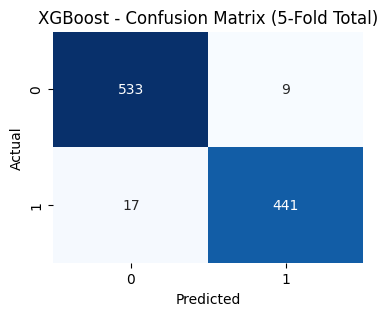


Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       542
           1       0.98      0.96      0.97       458

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 367, number of negative: 433
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.458750 -> initscore=-0.165376
[LightGBM] [Info] Start training from score -0.165376
[Ligh

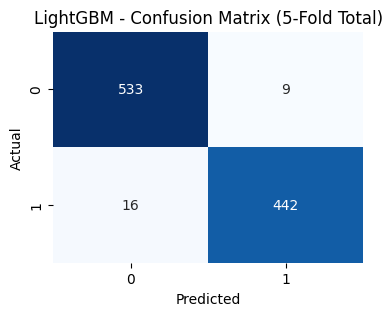


Classification Report for LightGBM:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       542
           1       0.98      0.97      0.97       458

    accuracy                           0.97      1000
   macro avg       0.98      0.97      0.97      1000
weighted avg       0.98      0.97      0.97      1000


Overall Comparison:
               Model  Accuracy  Precision    Recall  F1 Score
4           LightGBM     0.975   0.980199  0.965122  0.972408
3            XGBoost     0.974   0.980062  0.962948  0.971243
0      Random Forest     0.968   0.971157  0.958552  0.964774
2  Gradient Boosting     0.963   0.968969  0.949881  0.959195
1      Decision Tree     0.963   0.973112  0.945533  0.958877


In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42)
}

# Set up StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


def evaluate_model_with_cm_and_report(name, model):
    acc, prec, rec, f1 = [], [], [], []
    cm_total = np.array([[0, 0], [0, 0]])

    # Store all predictions and true labels for final report
    all_y_true = []
    all_y_pred = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        acc.append(accuracy_score(y_val, y_pred))
        prec.append(precision_score(y_val, y_pred))
        rec.append(recall_score(y_val, y_pred))
        f1.append(f1_score(y_val, y_pred))

        cm = confusion_matrix(y_val, y_pred)
        cm_total += cm

        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

    # Confusion matrix plot
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} - Confusion Matrix (5-Fold Total)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Aggregated classification report
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(all_y_true, all_y_pred, digits=2))

    return {
        'Model': name,
        'Accuracy': np.mean(acc),
        'Precision': np.mean(prec),
        'Recall': np.mean(rec),
        'F1 Score': np.mean(f1)
    }

# Run evaluations
results_cm = [evaluate_model_with_cm_and_report(name, model) for name, model in models.items()]

# Display metrics summary
results_cm_df = pd.DataFrame(results_cm)
print("\nOverall Comparison:")
print(results_cm_df.sort_values(by='F1 Score', ascending=False))


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib  # optional if saving encoders

# Step 1: Load the unseen dataset
unseen_df = pd.read_excel("sample_unseen_dataset.xlsx")

# Step 2: Manual fixes if necessary (e.g., column trimming, NaN handling)
# unseen_df = unseen_df.fillna(method='ffill')  # if needed

# Step 3: Same preprocessing as training - Label Encoding
# Assume you already have the label_encoders from training
# If not, you must load/save them accordingly

# These should match the columns you label-encoded during training
categorical_cols = ['Service Unit', 'Bill Unit', 'Pay Unit', 'Gender', 'Marital Status', 'Race']

# Apply the same encoders
for col in categorical_cols:
    if col in unseen_df.columns:
        if col in label_encoders:
            unseen_df[col] = unseen_df[col].map(lambda s: label_encoders[col].transform([s])[0] if s in label_encoders[col].classes_ else -1)
        else:
            print(f"Warning: No encoder found for column: {col}")


NameError: name 'label_encoders' is not defined

In [ ]:
import pandas as pd
X = df.drop(['IsCaregiverTerminated'], axis=1)
y = df['IsCaregiverTerminated']


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Define hyperparameter grids
models = {
    'GradientBoosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'model__n_estimators': [50, 100],
            'model__learning_rate': [0.01, 0.1],
            'model__max_depth': [3, 5, 7],
            'model__min_samples_split': [2, 5],
            'model__min_samples_leaf': [1, 2],
            'model__subsample': [0.8, 1.0]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'model__criterion': ['gini', 'entropy'],
            'model__max_depth': [None, 5, 10, 20],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4],
            'model__max_features': [None, 'sqrt', 'log2']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators': [50, 100],
            'model__max_depth': [None, 10, 20],
            'model__min_samples_split': [2, 5],
            'model__min_samples_leaf': [1, 2],
            'model__bootstrap': [True, False]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(),
        'params': {
            'model__n_estimators': [50, 100],
            'model__learning_rate': [0.01, 0.1],
            'model__num_leaves': [31, 50],
            'model__max_depth': [-1, 10, 20],
            'model__min_child_samples': [20, 30],
            'model__subsample': [0.8, 1.0],
            'model__colsample_bytree': [0.8, 1.0]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'params': {
            'model__n_estimators': [50, 100],
            'model__max_depth': [3, 6, 10],
            'model__learning_rate': [0.01, 0.1],
            'model__subsample': [0.8, 1],
            'model__colsample_bytree': [0.8, 1]
        }
    }
}

In [ ]:
# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scaler = StandardScaler()

In [ ]:
# Evaluate with tuning
def evaluate_model_with_tuning(name, model, param_grid):
    acc, prec, rec, f1 = [], [], [], []
    cm_total = np.array([[0, 0], [0, 0]])
    all_y_true = []
    all_y_pred = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]

        pipeline = Pipeline([
            ('scaler', scaler),
            ('model', model)
        ])

        grid = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='f1', error_score='raise')
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_val)

        acc.append(accuracy_score(y_val, y_pred))
        prec.append(precision_score(y_val, y_pred))
        rec.append(recall_score(y_val, y_pred))
        f1.append(f1_score(y_val, y_pred))

        cm = confusion_matrix(y_val, y_pred)
        cm_total += cm

        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

In [ ]:
#Confusion matrix plot
def evaluate_model_with_cm_and_report(name, model):
    acc, prec, rec, f1 = [], [], [], []
    cm_total = np.array([[0, 0], [0, 0]])

    all_y_true = []
    all_y_pred = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        acc.append(accuracy_score(y_val, y_pred))
        prec.append(precision_score(y_val, y_pred))
        rec.append(recall_score(y_val, y_pred))
        f1.append(f1_score(y_val, y_pred))

        cm = confusion_matrix(y_val, y_pred)
        cm_total += cm

        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

    # ✅ Plot confusion matrix here, inside the function
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} - Confusion Matrix (5-Fold Total)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"\nClassification Report for {name}:\n")
    print(classification_report(all_y_true, all_y_pred, digits=2))

    return {
        'Model': name,
        'Accuracy': np.mean(acc),
        'Precision': np.mean(prec),
        'Recall': np.mean(rec),
        'F1 Score': np.mean(f1)
    }


In [ ]:
# Report
def evaluate_model_with_cm_and_report(name, model):
    acc, prec, rec, f1 = [], [], [], []
    cm_total = np.array([[0, 0], [0, 0]])

    all_y_true = []
    all_y_pred = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        acc.append(accuracy_score(y_val, y_pred))
        prec.append(precision_score(y_val, y_pred))
        rec.append(recall_score(y_val, y_pred))
        f1.append(f1_score(y_val, y_pred))

        cm = confusion_matrix(y_val, y_pred)
        cm_total += cm

        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

    # Plot
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm_total, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} - Confusion Matrix (5-Fold Total)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Report
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(all_y_true, all_y_pred, digits=2))

    return {
        'Model': name,
        'Accuracy': np.mean(acc),
        'Precision': np.mean(prec),
        'Recall': np.mean(rec),
        'F1 Score': np.mean(f1)
    }

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

def evaluate_model_with_tuning(name, model, params):
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    grid = GridSearchCV(pipe, param_grid=params, cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X, y)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X)

    print(f"\nBest parameters for {name}: {grid.best_params_}")
    print(f"Classification Report for {name}:\n")
    print(classification_report(y, y_pred))

    return {
        'Model': name,
        'Accuracy': accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'F1 Score': f1_score(y, y_pred)
    }


In [ ]:
results_cm = [evaluate_model_with_tuning(name, config['model'], config['params'])
              for name, config in models.items()]



Best parameters for GradientBoosting: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100, 'model__subsample': 0.8}
Classification Report for GradientBoosting:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       542
           1       1.00      1.00      1.00       458

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Best parameters for DecisionTree: {'model__criterion': 'entropy', 'model__max_depth': 20, 'model__max_features': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5}
Classification Report for DecisionTree:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       542
           1       1.00      1.00      1.00       458

    accuracy                        

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 458, number of negative: 542
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 396
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.458000 -> initscore=-0.168397
[LightGBM] [Info] Start training from score -0.168397

Best parameters for LightGBM: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': -1, 'model__min_child_samples': 20, 'model__n_estimators': 100, 'model__num_leaves': 31, 'model__subsample': 0.8}
Classification Report for LightGBM:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       542
           1       1.00      1.00      1.00       458

    accuracy        

In [ ]:
results_cm_df = pd.DataFrame(results_cm)
print("\nOverall Comparison:")
print(results_cm_df.sort_values(by='F1 Score', ascending=False))



Overall Comparison:
              Model  Accuracy  Precision    Recall  F1 Score
0  GradientBoosting     1.000   1.000000  1.000000  1.000000
2      RandomForest     1.000   1.000000  1.000000  1.000000
3          LightGBM     1.000   1.000000  1.000000  1.000000
1      DecisionTree     0.998   0.995652  1.000000  0.997821
4           XGBoost     0.998   0.997817  0.997817  0.997817


In [ ]:
from sklearn.model_selection import train_test_split

# Assume 'X' is your feature dataframe and 'y' is your target series
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify feature types
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target leakage possibility manually (optional check)
# If any column is derived from the target or looks suspicious, drop it here

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


In [ ]:
models = {
    'GradientBoosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'model__n_estimators': [100],
            'model__learning_rate': [0.05],
            'model__max_depth': [3, 5],
            'model__min_samples_split': [5],
            'model__min_samples_leaf': [2],
            'model__subsample': [0.8]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'model__max_depth': [5, 10],
            'model__min_samples_split': [5],
            'model__min_samples_leaf': [2],
            'model__max_features': ['sqrt']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators': [100],
            'model__max_depth': [10],
            'model__min_samples_split': [5],
            'model__min_samples_leaf': [2],
            'model__bootstrap': [True]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(),
        'params': {
            'model__n_estimators': [100],
            'model__learning_rate': [0.05],
            'model__num_leaves': [20],
            'model__max_depth': [5],
            'model__min_child_samples': [20],
            'model__subsample': [0.8],
            'model__colsample_bytree': [0.8]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(eval_metric='logloss', reg_alpha=0.5, reg_lambda=1),
        'params': {
            'model__n_estimators': [100],
            'model__max_depth': [5],
            'model__learning_rate': [0.05],
            'model__subsample': [0.8],
            'model__colsample_bytree': [0.8]
        }
    }
}


In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model_with_tuning(name, model, param_grid):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    grid = GridSearchCV(pipeline, param_grid, cv=skf, n_jobs=-1, scoring='f1', error_score='raise')
    grid.fit(X_train_full, y_train_full)

    best_model = grid.best_estimator_
    y_test_pred = best_model.predict(X_test)

    print(f"\n{name} - Test Set Evaluation")
    print(classification_report(y_test, y_test_pred, digits=2))

    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred)
    }


In [ ]:
results_cm = [evaluate_model_with_tuning(name, config['model'], config['params']) for name, config in models.items()]
results_df = pd.DataFrame(results_cm)

print("\nOverall Model Comparison (on Hold-out Test Set):")
print(results_df.sort_values(by='F1 Score', ascending=False))



GradientBoosting - Test Set Evaluation
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       108
           1       1.00      0.96      0.98        92

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200


DecisionTree - Test Set Evaluation
              precision    recall  f1-score   support

           0       0.73      0.95      0.82       108
           1       0.91      0.58      0.71        92

    accuracy                           0.78       200
   macro avg       0.82      0.76      0.77       200
weighted avg       0.81      0.78      0.77       200


RandomForest - Test Set Evaluation
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       108
           1       0.99      0.90      0.94        92

    accuracy                           0.95       200
   macro avg    

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 366, number of negative: 434
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 262
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.457500 -> initscore=-0.170411
[LightGBM] [Info] Start training from score -0.170411
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [ ]:
#XGBOOST model
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import joblib

# Load your original dataframe
# df = pd.read_csv("your_dataset.csv")  # Replace this with your actual DataFrame if needed

# Step 1: Encode categorical features
categorical_cols = ["Gender", "Marital Status", "Race"]  # change as per your columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 2: Split features and target
X = df_encoded.drop(columns=["IsCaregiverTerminated"])
y = df_encoded["IsCaregiverTerminated"]

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)

# # Step 5: Save model
joblib.dump(xgb_model, "xgboost_model.pkl")



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:12:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


['xgboost_model.pkl']

In [ ]:
!pip install shap


In [ ]:
# Identify non-numeric columns in X
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)



Non-numeric columns: Index([], dtype='object')


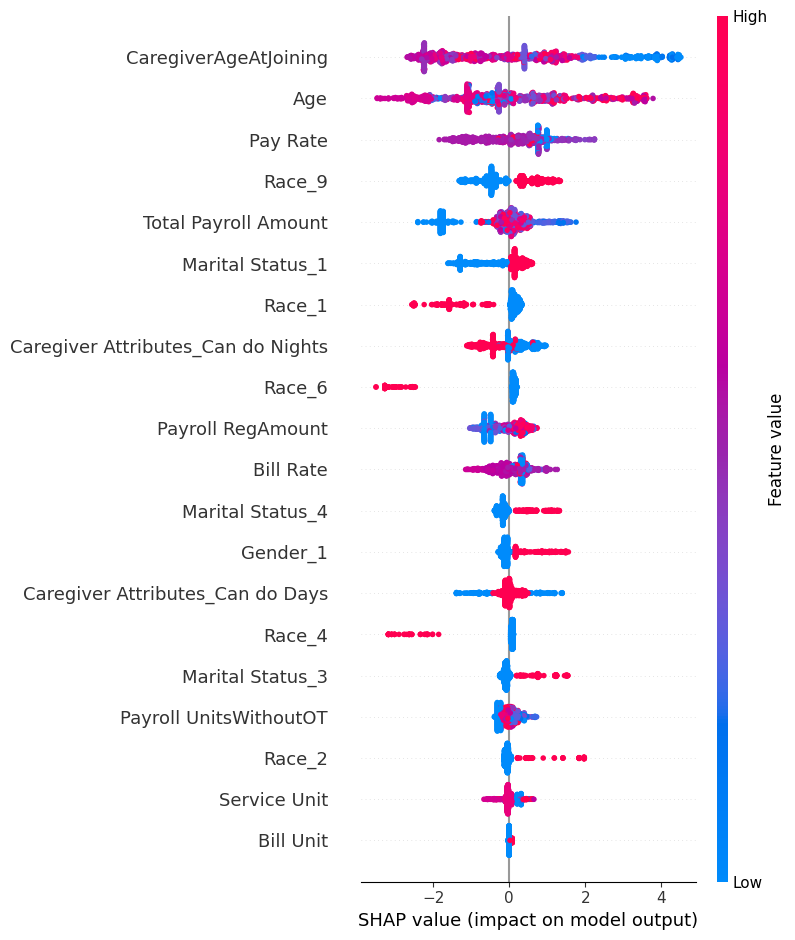

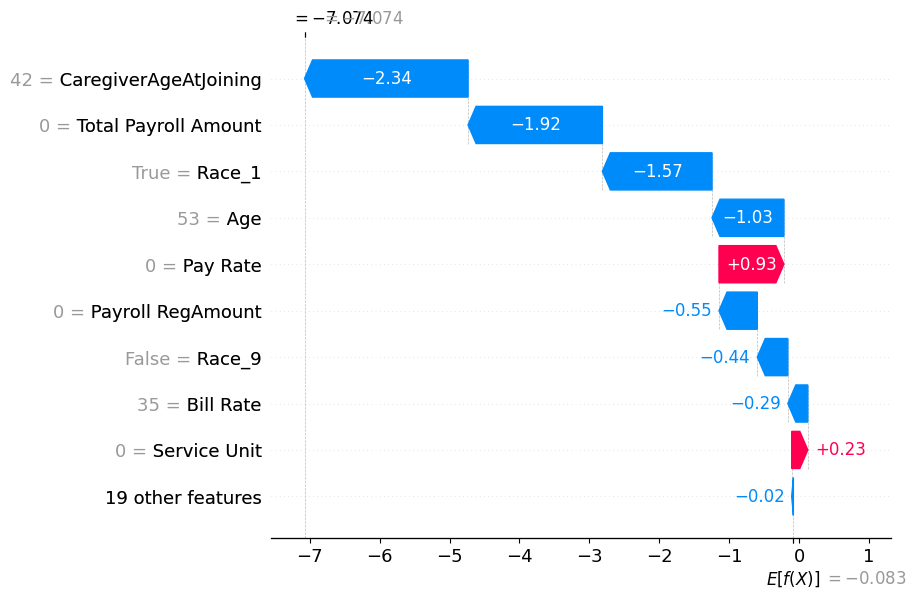

In [ ]:
import shap

# Use TreeExplainer for XGBoost models
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Summary plot
shap.summary_plot(shap_values, X)

# Waterfall plot for first prediction
shap.plots.waterfall(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X.iloc[0]))



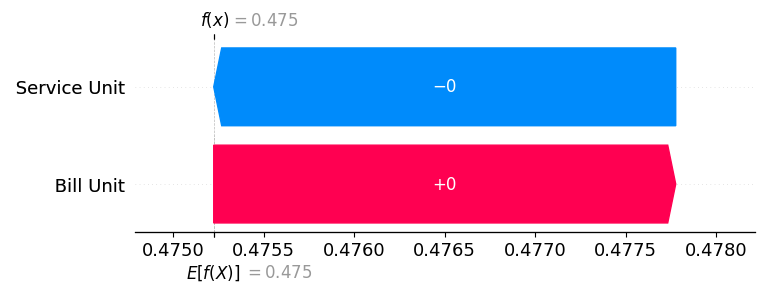

In [ ]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Step 1: Prepare Data
X = df_encoded.drop(columns=["IsCaregiverTerminated"])
y = df_encoded["IsCaregiverTerminated"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Safe SHAP
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)  # shap_values[1] → for class 1

# Step 4: SHAP Waterfall for First Sample
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[1], shap_values[1][0], X_test.iloc[0]
)
